<a href="https://colab.research.google.com/github/ThomasWong2022/ThomasWong2022.github.io/blob/main/Introduction_To_Quantitative_Finance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Python Packages needed

In [ ]:
! pip install yfinance
! pip install scikit-learn
! pip install PyPortfolioOpt
! pip install hmmlearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.4/160.4 kB 4.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


## Lecture 1: The Very Basics of Financial Market

We will discuss how to perform the most basic analysis of stock market.

Starting with how to process price data, we will describe the statistical properies of equity returns. We will explore the overnight return anomaly and the importance of transaction costs modelling.





### What is financial market

Investing and trading can be defined as generating returns through taking various kind of risks. Investors are compensated for taking risks and higher the return, higher the risk would be.

#### Examples of risks in investing and trading

- market risk (systematic risk): risks that are related to overall economy. Example include financial crisis and covid. These risks cannot be easily diversified.
- idiosyncratic risk: risks that are related to a single stock/asset. For example, the stock price of a company might go down due to changes in management. Other companies within the same industry is NOT affected by this
- liquidity risk: how easy to sell the holdings in our portfolio which can be measured by price impact. For example: high yield bonds are NOT liquid during market crash (2008/2020).
- credit risk: the risk that issuer of a bond become default and we cannot get back all of the money we lend to the issuer
- interest rate risk: the risk that the market value of our bonds decreasing due to rise in interest rates
- inflation risk: the risk that our currency can buy less (real) goods in future, usually measured against commodities and gold
- forex risk: when invest in assets denominated NOT in our own currency, the value will flucuate due to changes in currency exchange rates
- counterparty risk: when engaging derivatives trades, the risk that our counterparty cannot fulfill the payment according to contract terms


### Price data


Price data is defined by two charactereistics, frequency of data and types of data. Frequency of data can ranged from microseconds data (tick level) to end-of-date data (daily resolution). We will focus on data that have a minute resoluion or above. Major types of data include bar data, trade data and quote data.

In an exchange, quote data (Orderbook) is displayed for a stock in real time which has the bid and ask price (with size) submitted by different market participants. Market makers are responsible for providing liquidity to different traded assets, by placing quotes continuously. A trade is made if someone is willing the buy the security at the ask price (or sell the security at the bid price). Trade data is simply a collection of all the trades of a stock made at different exchanges, along with delayed data reported from dark pools. Bar data is then aggregrated using the trade price and volume over an interval, which usually is a minute, an hour and a day.

A typical bar data would consists of 5 data fields: Open, High, Low, Close and Volume (OHLCV). For free data sources you can found online, volume data will often has the most discrepencies as off-exchange trades are often ignored/miscounted.


We will first illustrate some basic concepts in finance using the most famous ETF, SPDR S&P 500 (SPY) which keep tracks of the most important stock market index S&P 500 in the world. This ETF invest in the 500 biggest stocks listed in the US, weighted by market-cap. (The exact rules to construct S&P 500 index is more complicated than this)

In this lecture series, we will use data from Yahoo Finance through the package yfinance. The data is accurate for the most liquid US stocks and ETF. However, the data for international equitites often contain errors.

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd

In [ ]:
selected_etf = yf.Ticker("SPY")
hist = selected_etf.history(period="max")

### How to process data

As stocks can pay dividend and have splits, we usually use adjusted price to perform statistical analysis. From the adjusted price, we can derive the total return of the stock (which is the sum of price return and dividends, reinvested).

Always check whether dividend and splits are adjusted before running your models.

Here I provide two examples of why data management is important and how listed companies can use that as their own advantage.

- Example 1: Stock splits         
A stock split in theory do not change the underlying value of the company, but for retail investors looking at the price at their apps, it does look cheaper, so people buy more. Tesla has undergone stock splits more than twice in the last 5 years and stock price rises significantly after splits.

- Example 2: Ticker name change        
GSX Techedu (GOTU) changes its ticker from GSX even without any major changes such as M&A or corporate restructuring. For retail investors, it appears as new stock for them. It also distances itself from the negative press as Muddy Waters and others are holding a short position against them.  Search engine results for GSX and GOTU are different. It seems to me like a form of Search Engine Optimisation.
After the name change, some of the free apps that most retail traders use to keep track of stock prices cannot recognise this change and return incomplete historical data.



In [ ]:
hist.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-09-28,439.690002,440.040009,432.940002,433.720001,130436300,0.0,0
2021-09-29,435.190002,437.040009,433.850006,434.450012,82329200,0.0,0
2021-09-30,436.019989,436.769989,428.779999,429.140015,140181200,0.0,0
2021-10-01,430.980011,436.029999,427.230011,434.239990,129240100,0.0,0
2021-10-04,433.000000,433.959991,426.359985,428.640015,128430500,0.0,0


Stock price are not stationary as they tend to grow over time.



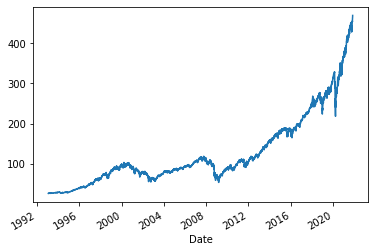

In [ ]:
hist['Close'].plot()

In [ ]:
## Calculating log-returns
hist['log_return'] = np.log(hist['Close']) - np.log(hist['Close'].shift(1))

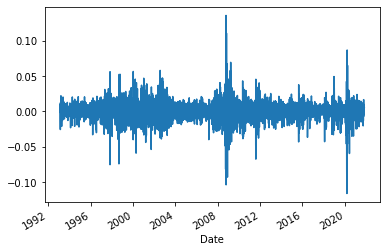

In [ ]:
hist['log_return'].plot()

### Statistical properties of stock market log-returns

- It has a positive mean, which is bigger than the average 10-year Treasury yield. This is called the risk premium of equity market

- It has a negative skew, which demonstrates the fact the stock market experiences sharp drawdowns over a short period (2008,2020)

- It has a kurtosis greater than 3, suggesting it is more fat-tail than a normal distribution.

- The assumption of log-return following Gaussian distribution(Geometric Brownian Process) is the foundation of Black-Scholes option pricing model.



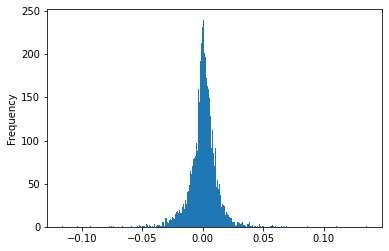

In [ ]:
hist['log_return'].plot.hist(bins=500)

In [ ]:
hist['log_return'].describe()

count    7246.000000
mean        0.000401
std         0.011811
min        -0.115887
25%        -0.004266
50%         0.000695
75%         0.005869
max         0.135577
Name: log_return, dtype: float64

In [ ]:
hist['log_return'].skew()

-0.30197630152612415

In [ ]:
hist['log_return'].kurtosis()

11.806630132171392

### Why transaction costs are important, an example from overnight return

We can separate the return of stock market into two parts. One as the close-to-open return (overnight return) and open-to-close return (intraday return)

We can see intraday return has a mean close to zero, suggesting the mean-reversion nature of stock price during market hours.

Most of the stock market return, for a buy-and-hold strategy in the long run, comes from holding stocks overnight. This can be considered as compensation of the risk to hold stocks overnight. Holding stocks over the weekend and holiday will provide a similar risk premium.

Buy at close and sell at tomorrow's open can generate higher returns than buy-and-hold before transaction costs. Once transaction costs (0.1%) is taken into account, the strategy has a negative return.

Transaction costs modelling is a speciliased area in quantitative finance which will NOT be covered in this lecture series. The above example is to serve as a warning when a new trading signal is found, transaction costs and liquidity constraints needs to be taken into account. Profitable signals before transaction costs can persist as long as they are not easily to be arbitraged away due to transaction costs. A rule of thumb is that any intraday trading strategies needs to carefully reviewed on both data quality and transaction costs.



In [ ]:
## Buy and Close and Sell at next day Open
hist['intraday_return'] = np.log(hist['Close']) - np.log(hist['Open'])
hist['overnight_return'] = np.log(hist['Open']) - np.log(hist['Close'].shift(1))

In [ ]:
hist['intraday_return'].describe()

count    7247.000000
mean        0.000001
std         0.009640
min        -0.094207
25%        -0.004133
50%         0.000436
75%         0.004581
max         0.088892
Name: intraday_return, dtype: float64

In [ ]:
hist['overnight_return'].describe()

count    7246.000000
mean        0.000400
std         0.006721
min        -0.110357
25%        -0.002049
50%         0.000629
75%         0.003211
max         0.059519
Name: overnight_return, dtype: float64

In [ ]:
## Sharpe ratio
hist['log_return'].mean() / hist['log_return'].std() * np.sqrt(252)

0.5388008834174007

In [ ]:
hist['overnight_return'].mean() / hist['overnight_return'].std() * np.sqrt(252)

0.9439765261320863

In [ ]:
## Add transaction costs (0.1%)
hist['overnight_return'] = np.log(hist['Open']) - np.log(hist['Close'].shift(1)) - 0.001

In [ ]:
hist['overnight_return'].mean() / hist['overnight_return'].std() * np.sqrt(252)

-1.4177814990893496

### Sharpe Ratio

We can measure the performance of a trading strategy by the sharpe ratio, which is ratio of excess return over to the volatility.

Sharpe_Ratio = $\frac{r-r_f}{\sigma}$, where r is the return of the portfolio and $\sigma$ the standard deviation of the return of the portfolio.

For simplicity, we assume riskfree return as zero in the following calculations. For Long-only portfolios, the return of US 10Y Treasury (IEF) should be used as the riskfree rate. For dollar-neutral strategies where leverage is allowed, the borrowing cost should be used as the riskfree rate.

The custom of using 10Y Treasury return as a riskfree rate is due to the fact the sharpe ratios of investment strategies are often calculated on a long-time horizon (>10 years).

It is uncertain where 10Y Treasury would continue be a good benchmark of riskfree return when correlation between stocks and bonds changes and bond yields are at historically low.

### Expected return and skewness  

The statistical properies of market risk premium can be summarised as the following result.

Theorem 1: Relationship between expected return and skewness

- Strategies that have a positive expected return (short volaility/fx and fixed income carry) will have a negative skew
- Strategies that have a negative expected return (long Call/Put options) will have a positive skew

This presents a dilemma in portfolio construction. Income generating strategies such as short volatility will exposes us to the heavy left tail risk. However buying call/put options will bleed our portfolio due to negative carry.

A well structured portfolio can offer positive return in the long run with some exposure to right tail positions (benefit from volatility rising), thus allowing returns above the market.


The next few lectures would be to explore this idea through different strategies.


### Recommended readings

- Algorithmic Trading: Winning Strategies and Their Rationale, Ernest P. Chan

- Advances in Financial Machine Learning, Marcos López de Prado

- A Complete Guide to the Futures Market: Technical Analysis, Trading Systems, Fundamental Analysis, Options, Spreads, and Trading Principles (Wiley Trading), Jack D. Schwager

- Principles For Navigating Big Debt Crisis, Ray Dalio https://www.principles.com/big-debt-crises/

- The Black Swan: The Impact of the Highly Improbable, Nassim Nicholas Taleb

- The Rise of Carry: The Dangerous Consequences of Volatility Suppression and the New Financial Order of Decaying Growth and Recurring Crisis, Tim Lee Jamie Lee Kevin Coldiron

## Lecture 2 Market Regimes and Volatility

We will explore different definitions of volatility, namely historical volatility and implied volatility.

Historical volatility can be calculated from the price of the asset. It is backward looking. We often calculate (3-month/6-month/12-month) rolling volatility as a risk measure. Implied volatility needs to derived from the option prices of the asset and is forward looking. Implied volatility depends on both the moneyness and maturity of an option. It can be visualised as a volatility surface. It can be interpreted as the market expectation of risk.



In this lecture, we demonstrate how volatility scaling can improve the sharpe ratio of a buy-and-hold strategy. We will then show that the buy-and-hold strategy is inherent a short volatility strategy, which means it benefits when market volatility is low/falling. At the end we provide a very simple market regime model based on VIX and how it is similar to the model obtained by Hidden Markov Model.

### Volatility Scaling


Volatility is detrimental to the long-term growth of capital as a strategy down 20% needs a 25% growth to recover.

By adjusting our stock holdings so that portfolio is at a constant volatility, so that we buy more during low volatility times and buy less during high volatility times. The Sharpe ratio can be improved compared to a constant buy-and-hold strategy.

Volatility plays an important role in portfolio construction and risk management. Risk parity, a famous hedge fund strategy aims to hold constant volatility exposure to different assets in the portfolio, rather than equal weighted.



In [ ]:
selected_etf = yf.Ticker("SPY")
hist = selected_etf.history(period="max")
hist['return'] = hist['Close'].pct_change()
hist['volatility'] = hist['return'].rolling(252).std() * np.sqrt(252)

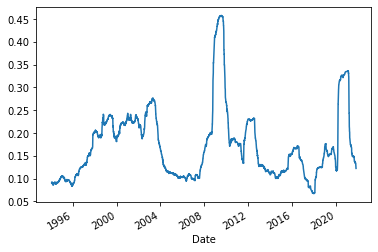

In [ ]:
## Volatility of stock is NOT constant
hist['volatility'].plot()

In [ ]:
# Standardise return to 15%
hist['vol_adj_return'] = hist['return'] / hist['volatility'] * 0.15
hist['vol_port_size'] = 0.15 / hist['volatility']

In [ ]:
hist['return'].mean() / hist['return'].std() * np.sqrt(252)

0.6330183833036649

In [ ]:
## Improvement of Sharpe ratio of constant vol strategy
hist['vol_adj_return'].mean() / hist['vol_adj_return'].std() * np.sqrt(252)

0.7540964723661074

To carry out the above volatility adjusted strategy, you need to have access to leverage.

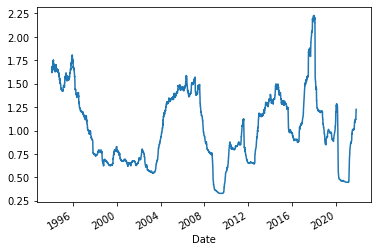

In [ ]:
hist['vol_port_size'].plot()

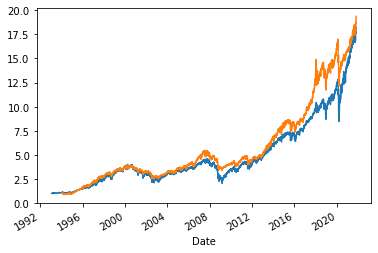

In [ ]:
(1+hist['return']).cumprod().plot()
(1+hist['vol_adj_return']).cumprod().plot()

### VIX, the fear gauge

VIX is considered as a fear gauge of global market.

VIX is derived from the implied volatility of front-month options of SPX index. It is not possible to invest in VIX directly. There are volatility ETFs which keep tracks of the VIX Futures, where traders buy and sell to express their views on market volatility. VXX is an example of volatility ETF that are widely traded by retail. Due to rollover costs, VXX will generate a much worse return than VIX.

A crucial feature is that holding VIX futures, and similarly buying Put Options on SPY generates a negative return in the long run.

Considering the correlation between VXX (Long volatility) and SH (Short SPY) we conclude the long volatility strategies are inherently shorting the market. Assuming we can short VXX (that is short volatility) without additional borrowing cost, it will have a high correlation with the market return (long SPY). This is why we call buy-and-hold equity as inherenetly a short volatility strategy.

Since buy-and-hold VXX will simply cancels the return from holding SPY, therefore VXX alone is not a good portfolio hedge.




In [ ]:
## VIX index, the fear gauge of the global equity market
selected_etf = yf.Ticker("^VIX")

In [ ]:
vixhist = selected_etf.history(period="max")

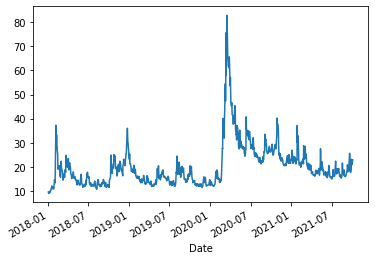

In [ ]:
vixhist['Close'].loc['2018-01-01':].plot()

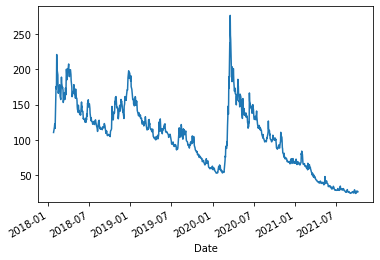

In [ ]:
selected_etf = yf.Ticker("VXX")
vxxhist = selected_etf.history(period="max")
vxxhist['Close'].loc['2018-01-01':].plot()

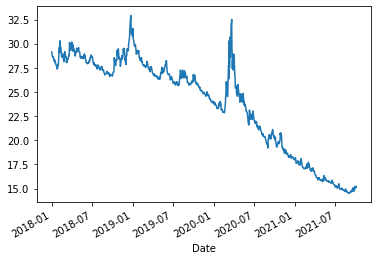

In [ ]:
selected_etf = yf.Ticker("SH")
shhist = selected_etf.history(period="max")
shhist['Close'].loc['2018-01-01':].plot()

In [ ]:
## Very high correlation between long volatility (UVXY) and short equity (SH)
np.corrcoef(shhist['Close'].loc['2020-01-01':],vxxhist['Close'].loc['2020-01-01':])[0,1]

0.862606495929021

There are more than one kind of volatility ETFs

- VXX keep track of the S&P 500 VIX Short-Term Futures Index Total Return

- VXZ keep track of S&P 500 VIX Mid-Term Futures Index.

VXZ has a less significant contango effect than VXX, but keep track of the spot VIX less well.

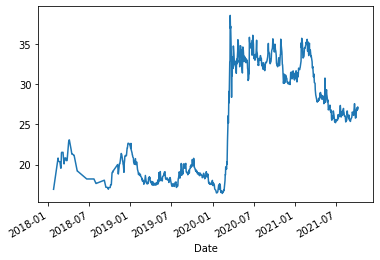

In [ ]:
selected_etf = yf.Ticker("VXZ")
vxzhist = selected_etf.history(period="max")
vxzhist['Close'].loc['2018-01-01':].plot()

### Market Regime model

We will provide a very simple example of market regime model using Hidden Markov Model (HMM), which is equivalent conditioning stock returns on implied volatility (VIX).

In the industry, much more sophiscated models are used. TwoSigma builds a GMM model which classify market into four different states based on the return of 17 risk-premium factors.

A two-state HMM will learn a model that is very similar to splitting the return based on the value of VIX

In [ ]:
from hmmlearn.hmm import GaussianHMM
import yfinance as yf
import numpy as np

selected_etf = yf.Ticker("SPY")
spyhist = selected_etf.history(period="max")
spyhist['Return'] = spyhist['Open'].pct_change()
trainrets = spyhist.loc['1996-01-01':'2017-01-01']
testrets = spyhist.loc['2018-01-01':'2022-02-25']

In [ ]:
hmm_model = GaussianHMM(
        n_components=2, covariance_type="full", n_iter=1000
    ).fit(trainrets['Return'].values.reshape(-1, 1))


In [ ]:

testrets['State'] = hmm_model.predict(testrets['Return'].values.reshape(-1, 1))
testrets['Filtered'] = testrets['State'] * testrets['Close']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


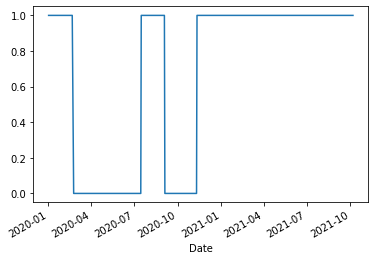

In [ ]:
testrets['State'].loc['2020-01-01':].plot()

In [ ]:
## State 0 is bear market
## State 1 is bull market
testrets.groupby('State').mean()['Return']

State
0   -0.000540
1    0.001014
Name: Return, dtype: float64

In [ ]:
testrets.groupby('State').std()['Return']

State
0    0.021660
1    0.007312
Name: Return, dtype: float64

Can we obtain a similar model by cosidering the value of VIX?

In [ ]:
selected_etf = yf.Ticker("SPY")
spyhist = selected_etf.history(period="max").loc['1996-01-01':'2022-01-01']
selected_etf = yf.Ticker("^VIX")
vixhist = selected_etf.history(period="max").loc['1996-01-01':'2022-01-01']
spyhist['Return'] = spyhist['Close'].pct_change()
spyhist['VIX'] = vixhist['Close'].rolling(20).mean()
spyhist['VIX_State'] = np.where(spyhist['VIX']<25,1,0)
trainrets = spyhist.loc['1996-01-01':'2015-01-01']
testrets = spyhist.loc['2018-01-01':'2022-01-01']

In [ ]:
testrets.groupby('VIX_State').mean()['Return']

VIX_State
0    0.001827
1    0.000507
Name: Return, dtype: float64

In [ ]:
testrets.groupby('VIX_State').std()['Return']

VIX_State
0    0.024047
1    0.009449
Name: Return, dtype: float64

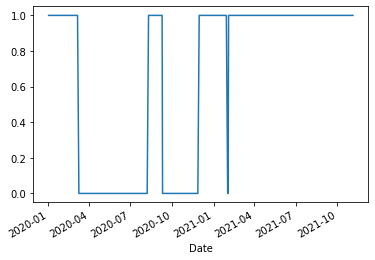

In [ ]:
testrets['VIX_State'].loc['2020-01-01':].plot()

Changing the number of of hidden states in HMM model. The returns are clustered in three different states.

1. Low volatility states with positive return (Normal)
2. Medium volatility states with near zero return (Recovery)
3. High volatility states with negative return (Stress)


In [ ]:
hmm_model = GaussianHMM(
        n_components=3, covariance_type="full", n_iter=1000
    ).fit(trainrets['Return'].dropna().values.reshape(-1, 1))


In [ ]:
testrets = spyhist.loc['2018-01-01':'2021-12-25']
testrets['Shifted_Return'] = testrets['Return'].shift(-1)
testrets['State'] = hmm_model.predict(testrets['Return'].values.reshape(-1, 1))
testrets['Filtered'] = testrets['State'] * testrets['Close']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

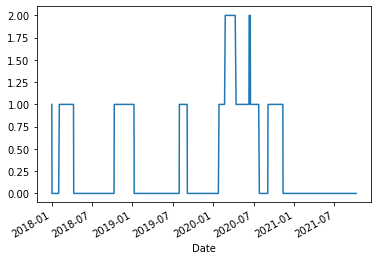

In [ ]:
testrets['State'].plot()

In [ ]:
testrets.groupby('State').mean()['Shifted_Return'] * np.sqrt(252)

State
0    0.015526
1    0.006685
2   -0.046941
Name: Shifted_Return, dtype: float64

In [ ]:
testrets.groupby('State').std()['Shifted_Return']

State
0    0.007017
1    0.014475
2    0.037721
Name: Shifted_Return, dtype: float64

In [ ]:
testrets.groupby('State').count()['Return']

State
0    645
1    266
2     38
Name: Return, dtype: int64

### Recommended readings

- Market Regime Identification Using Hidden Markov Models https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3406068

- Regime-Switching Factor Investing with Hidden Markov Models https://www.mdpi.com/1911-8074/13/12/311/htm

- A Machine Learning Approach to Regime Modeling https://www.twosigma.com/articles/a-machine-learning-approach-to-regime-modeling/


## Lecture 3 Technical Analysis

Technical analysis refers to the use of price data to predict future returns.

Under Efficient Market Hypothesis, it is impossible to use technical analysis to outperform the market. However, systematic trend following has achieved outsizing returns during 1980s.

In factor models, we create style factors which refers to selecting assets based on certain known price and fundamentals based attributes.

For price-based style factors, mean-reversion and momentum are often included.

Mean-reversion relies on the assumption that market over-reacts on news and shocks. Therefore, it is portfitable to buy the underperformers and sell them after they recover.

Mean-reversion can generate alpha because they often take on liquidity risk (Example: Buying EM credit after some geo-political events).
Another reason is due to positioning effect, liquidations of hedge funds can often result in high quality assets being sold at a discount. Mean-reversion take advantage of the temporary imbalance of order flow.
Another example would be retail traders being forced out as stop losses are hit.


Momentum can generate profits because of investor's herding behaviour. Market participants have a tendency to chase winners, such as Tesla. For stocks that have an important weight in the index, a positive reinforcement loop can result as the stock price increases, its weighting increases, resulting a buying demand from passive investing funds.

Momentum can also be consider as a way of avoiding losers. When share price drops continuously, it is often the case where the company or the industry is getting out of favour (Example: High-Street retail). A downward spiral will result as the financial conditions will get worse (Bonds will get downgraded when company cannot make a profit for a few years), which makes recovery even more difficult.


For stocks, we often consider cross-sectional momentum, where we buy stocks that have best performance in the last year and sell stocks that have the worst performance in the last year. We can also rank momentum within each sector and industry to eliminate market risk.


Time-series momentum, which refers to the (absolute) measure of price action of a single asset due to autocorrelation is often called (systematic) trend-following. Trend Following is often used in a Managed Futures portfolio (CTA funds). Most of these funds are not avaliable to retail investors with the exception of a few ETFs such as

- WisdomTree Managed Futures Strategy Fund (WTMF:US)
- ProShares Managed Futures Strategy ETF (FUT:US)

The performance of these ETFs often lag behind the benchmark of trend-following funds (Eurekahedge CTA/Managed Futures Hedge Fund Index).







### Mean-Reversion vs Momentum: z-score of rolling return

We consider a very simple strategy of mean version. We hold the asset for 20 days based on z-score of the current price, normalised with respect to the rolling avearge 1-month price with 3-month volatility.

When then rounded the z-scores the group the return into different groups. When the z-score is -1 or -2, suggesting it is below the average price, forward 20 days return on these states are higher than when they are above zero.

This demonstrate the mean-reversion behaviour of stock price. Stocks tends to recover from small shocks (but not necesarily big shocks), therefore buying the dip can achieve a higher sharpe ratio.

As expected, the effect of mean-reversion diminishes over a longer time-horizon. When we consider 200 days forward return, there is not much different from the sharpe ratio between various z-scores states.

In [ ]:
def Bollinger(ticker='QQQ', forward_return=20, start='2004-01-01', end='2031-01-01'):
  stock = yf.download(ticker, start=start, end=end).dropna()
  stock['Return'] = stock['Adj Close'].pct_change()
  stock['Shifted_Return'] = np.log(stock['Adj Close'].shift(-1*forward_return)) - np.log(stock['Adj Close'].shift(-1))
  stock['Price'] = (1+stock['Return']).cumprod()
  stock['BB_Width'] = stock['Price'].rolling(250).std()
  stock['BB_Moving'] = stock['Price'].rolling(250).mean()
  stock['BB_signal'] = (stock['Price']-stock['BB_Moving']) / stock['BB_Width']
  stock['BB_state'] = np.clip(np.round(stock['BB_signal']),-2,2)
  table = stock.groupby(['BB_state']).agg(['mean','std','count'])['Shifted_Return']
  table.loc[100,:] = stock.agg(['mean','std','count'])['Shifted_Return']
  table['Sharpe'] = table['mean'] / table['std'] * np.sqrt(252/forward_return)
  return table, stock

In [ ]:
train = list()
test = list()
for forward in [40,160,]:
    for ticker in ['XME','GDX','XLE','XLB','QQQ','SPY',]:
        table, stock = Bollinger(ticker=ticker, forward_return=forward, start='2009-01-01', end='2019-01-01')
        X = table.transpose()
        X['forward'] = forward
        X['ticker'] = ticker
        train.append(X)
        table, stock = Bollinger(ticker=ticker, forward_return=forward, start='2019-01-01', end='2025-01-01')
        X = table.transpose()
        X['forward'] = forward
        X['ticker'] = ticker
        test.append(X)
train = pd.concat(train)
test = pd.concat(test)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [ ]:
(train.loc['mean'].set_index(['forward','ticker']) * 100).round(2)

BB_state         -2.0   -1.0    0.0    1.0   2.0  100.0
forward ticker                                         
40      XME     -1.66  -4.34   1.15   2.27 -2.53   0.32
        GDX     -0.69  -1.14  -2.46  -2.27  1.01  -0.72
        XLE      4.07  -0.79   1.75  -0.49  0.67   0.85
        XLB      4.38   1.09   1.44   0.82  0.98   1.75
        QQQ      8.14   7.24   4.39   2.67  1.44   2.85
        SPY      7.74   5.20   2.34   1.91  1.09   2.14
160     XME     -1.21 -10.22   8.28  -0.38 -9.11   1.21
        GDX     -2.12  -3.66 -11.80  -4.58 -8.66  -3.51
        XLE      6.39   2.60   8.86   3.50 -2.12   4.25
        XLB     11.01   9.78   7.31   4.86  4.09   7.11
        QQQ     16.82  16.27  15.23  10.41  9.37  11.83
        SPY     13.63  13.59  12.86   7.65  6.72   9.05

In [ ]:
(test.loc['mean'].set_index(['forward','ticker']) * 100).round(2)

BB_state         -2.0   -1.0    0.0    1.0    2.0  100.0
forward ticker                                          
40      XME     11.67   3.72   3.60   0.89   3.02   2.27
        GDX      4.94   5.11   0.02  -5.99  -2.84   0.97
        XLE      1.35  -3.18   3.52   5.80   0.59   1.64
        XLB     10.74   1.97   2.97  -0.37  -0.39   1.72
        QQQ      3.57  -1.04   0.75   6.77   1.60   2.99
        SPY      7.18   0.35   0.96   3.69  -0.04   2.11
160     XME     45.69  27.10  19.37  13.14   5.98   9.81
        GDX     21.74   1.85  -4.97  -0.89 -13.17   3.88
        XLE     -4.32  29.19  11.40  18.70  14.93   7.55
        XLB     20.70  12.76   4.82   5.87   8.33   6.62
        QQQ      6.00  13.41   3.11  12.45  10.10  11.09
        SPY     12.20   9.85   6.52   8.16   7.42   7.65

In [ ]:
train.loc['Sharpe'].set_index(['forward','ticker']).round(2)

BB_state        -2.0  -1.0   0.0   1.0   2.0  100.0
forward ticker                                     
40      XME    -0.13 -0.12  0.22  0.25  0.10   0.06
        GDX    -0.25 -0.06  0.24 -0.56 -0.17  -0.14
        XLE    -0.22  0.54  0.32  0.58  0.09   0.27
        XLB     0.81  1.00  1.05  0.29  0.45   0.63
        QQQ     1.30  2.19  1.60  1.04  1.09   1.28
        SPY     1.10  1.87  1.20  0.98  1.20   1.06
160     XME     0.00  0.00 -0.04  0.07  0.02   0.05
        GDX    -0.23 -0.10 -0.01 -0.40 -0.35  -0.16
        XLE     0.38  0.43  0.41  0.35  0.18   0.37
        XLB     1.09  0.61  0.65  0.82  0.55   0.73
        QQQ     1.93  1.93  1.70  1.70  1.50   1.64
        SPY     1.81  1.71  1.31  1.39  1.32   1.40

In [ ]:
test.loc['Sharpe'].set_index(['forward','ticker']).round(2)

BB_state        -2.0  -1.0  -0.0   1.0   2.0  100.0
forward ticker                                     
40      XME     0.24  0.26  0.63  0.55  0.34   0.41
        GDX     0.75  0.37  0.34 -0.39 -0.14   0.19
        XLE     0.13  0.59  0.50 -0.16  0.20   0.27
        XLB     1.54  0.96  0.09  0.25  0.12   0.52
        QQQ     1.26  1.01  1.04  0.87  0.39   0.88
        SPY     1.75  1.56  0.64  0.86 -0.02   0.75
160     XME     0.63  0.50  0.59  0.43  0.59   0.49
        GDX     0.60  0.60  0.30 -0.09 -0.41   0.23
        XLE     0.14  0.66  0.22  0.12  0.69   0.34
        XLB     0.62  0.40  0.56  0.65  0.66   0.60
        QQQ     0.39  0.49  0.77  0.90  1.10   0.79
        SPY     0.57  0.42  0.75  0.89  1.02   0.80

In [ ]:
train.loc['count'].set_index(['forward','ticker'])

BB_state         -2.0   -1.0    0.0    1.0    2.0   100.0
forward ticker                                           
40      XME     359.0  546.0  524.0  654.0  353.0  2476.0
        GDX     386.0  644.0  533.0  529.0  344.0  2476.0
        XLE     316.0  456.0  501.0  695.0  468.0  2476.0
        XLB     250.0  370.0  481.0  841.0  494.0  2476.0
        QQQ     178.0  263.0  475.0  853.0  667.0  2476.0
        SPY     182.0  288.0  423.0  906.0  637.0  2476.0
160     XME     331.0  507.0  504.0  628.0  346.0  2356.0
        GDX     345.0  614.0  502.0  520.0  335.0  2356.0
        XLE     300.0  429.0  461.0  678.0  448.0  2356.0
        XLB     233.0  344.0  452.0  808.0  479.0  2356.0
        QQQ     164.0  258.0  456.0  803.0  635.0  2356.0
        SPY     169.0  283.0  413.0  853.0  598.0  2356.0

In [ ]:
test.loc['count'].set_index(['forward','ticker'])

BB_state         -2.0   -1.0   -0.0    1.0    2.0   100.0
forward ticker                                           
40      XME     149.0  230.0  251.0  363.0  223.0  1256.0
        GDX     182.0  308.0  243.0  287.0  196.0  1256.0
        XLE     147.0  269.0  217.0  338.0  245.0  1256.0
        XLB     137.0  207.0  234.0  407.0  231.0  1256.0
        QQQ     108.0  190.0  209.0  390.0  319.0  1256.0
        SPY     112.0  160.0  203.0  402.0  339.0  1256.0
160     XME     141.0  208.0  221.0  335.0  191.0  1136.0
        GDX     168.0  277.0  215.0  253.0  183.0  1136.0
        XLE     132.0  243.0  204.0  306.0  211.0  1136.0
        XLB     119.0  173.0  218.0  386.0  200.0  1136.0
        QQQ      96.0  167.0  185.0  355.0  293.0  1136.0
        SPY      94.0  142.0  178.0  373.0  309.0  1136.0

In [ ]:
stock.head()

,Open,High,Low,Close,Adj Close,Volume,Return,Shifted_Return,Price,BB_Width,BB_Moving,BB_signal,BB_state
Date,,,,,,,,,,,,,
2019-01-02,245.979996,251.210007,245.949997,250.179993,230.557449,126925200,NaN,0.189512,NaN,NaN,NaN,NaN,NaN
2019-01-03,248.229996,248.570007,243.669998,244.210007,225.055740,144140700,-0.023863,0.156257,0.976137,NaN,NaN,NaN,NaN
2019-01-04,247.589996,253.110001,247.169998,252.389999,232.594131,142628800,0.033496,0.122380,1.008834,NaN,NaN,NaN,NaN
2019-01-07,252.690002,255.949997,251.690002,254.380005,234.428070,103139100,0.007885,0.124027,1.016788,NaN,NaN,NaN,NaN
2019-01-08,256.820007,257.309998,254.000000,256.769989,236.630600,102512600,0.009395,0.115433,1.026341,NaN,NaN,NaN,NaN


In [ ]:
stock.tail()

,Open,High,Low,Close,Adj Close,Volume,Return,Shifted_Return,Price,BB_Width,BB_Moving,BB_signal,BB_state
Date,,,,,,,,,,,,,
2023-12-22,473.859985,475.380005,471.700012,473.649994,473.649994,67126600,0.002010,NaN,2.054369,0.073268,1.949439,1.432136,1.0
2023-12-26,474.070007,476.579987,473.989990,475.649994,475.649994,55387000,0.004223,NaN,2.063043,0.069691,1.956664,1.526439,2.0
2023-12-27,475.440002,476.660004,474.890015,476.510010,476.510010,68000300,0.001808,NaN,2.066773,0.066728,1.963451,1.548415,2.0
2023-12-28,476.880005,477.549988,476.260010,476.690002,476.690002,77158100,0.000378,NaN,2.067554,0.063683,1.969977,1.532245,2.0
2023-12-29,476.489990,477.029999,473.299988,475.309998,475.309998,122234100,-0.002895,NaN,2.061569,0.060844,1.975871,1.408483,1.0


<Axes: xlabel='Date'>

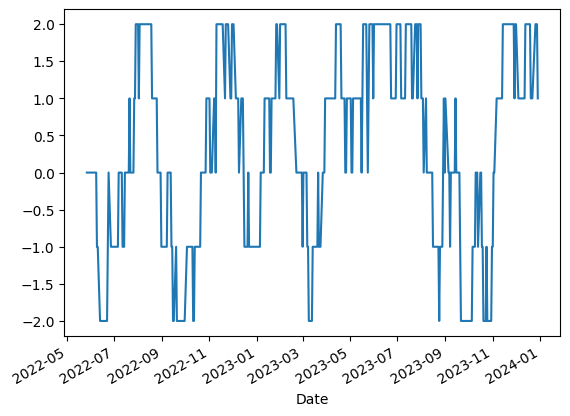

In [ ]:
stock['BB_state'].tail(400).plot()

### Trend Following: moving averages crossover

We will use Moving Averages Crossover, which is a very simple trend following strategy.

The stratgy requires the input of two parameters. A short term lookback and long term lookback. We compute the moving average of price based on these two lookback periods. We long the asset when the short-term MA is greater than the long-term MA and short the asset when the short-term MA fallers below the long-term MA.

How to make a robust trend following strategy

- Increase the number of assets traded
- Use different lookback periods to capture both short and long term trends
- Use different entry and exit rules
- Scale asset returns by volatility if leverage can be used
- Consider to be long-only as it is more difficult to profit from down trends, especially for equities.


In [ ]:
def Moving_Average(ticker='DBC',fast=5,slow=50,long_only=True,):
  stock = yf.download(ticker, start='2006-01-01', end='2021-11-01').dropna()
  stock['Return'] = stock['Adj Close'].pct_change()
  stock['Shifted_Return'] = np.log(stock['Adj Close'].shift(-2)) - np.log(stock['Adj Close'].shift(-1))
  stock['Price'] = (1+stock['Return']).cumprod()
  stock['MA_{}'.format(fast)] = stock['Price'].rolling(fast).mean()
  stock['MA_{}'.format(slow)] = stock['Price'].rolling(slow).mean()
  if long_only:
    stock['Portfolio_return'] = np.where(stock['MA_{}'.format(slow)]<stock['MA_{}'.format(fast)],1,0) * stock['Shifted_Return']
  else:
    stock['Portfolio_return'] = np.where(stock['MA_{}'.format(slow)]<stock['MA_{}'.format(fast)],1,-1) * stock['Shifted_Return']
  return stock

#### Commodities Trend Following

We demonstrate a very classic trend following strategy used by hedge funds on the ommodity ETF (DBC)

Trend Following improves significantly the sharpe ratio compared to buy-and-hold.

[*********************100%%**********************]  1 of 1 completed


<Axes: xlabel='Date'>

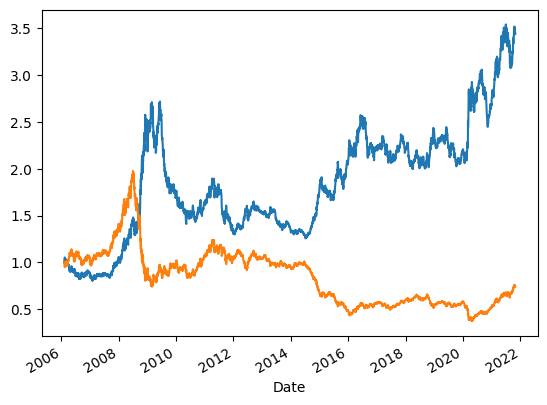

In [ ]:
stock = Moving_Average(ticker='DBC',fast=5,slow=50,long_only=False)
portfolio_sharpe = stock['Portfolio_return'].loc['2005-01-01':].mean() / stock['Portfolio_return'].loc['2005-01-01':].std() * np.sqrt(252)
original_sharpe = stock['Shifted_Return'].loc['2005-01-01':].mean() / stock['Shifted_Return'].loc['2005-01-01':].std() * np.sqrt(252)
(1+stock['Portfolio_return'].loc['2005-01-01':]).cumprod().plot()
(1+stock['Shifted_Return'].loc['2005-01-01':]).cumprod().plot()

In [ ]:
portfolio_sharpe, original_sharpe

(0.5029609753889424, -0.0009329987461270895)

#### Statistical property of trend following strategy

We compute the rolling 1 year return of both the underlying asset and the trend following strategy. The scatterplot shows a payoff similar to a long straddle. This is why trend following is called a long volatility strategy.

A detailed mathematical exposition on how the return from a trend following strategy can be approximated by a lookback straddle can be found in the paper[1].


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


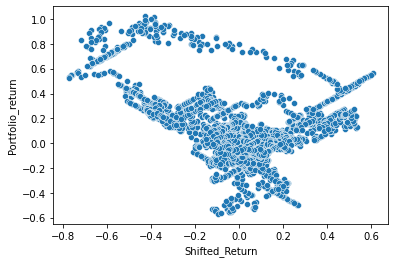

In [ ]:
import seaborn as sns
sns.scatterplot(stock['Shifted_Return'].rolling(252).mean() * 252,stock['Portfolio_return'].rolling(252).mean()* 252)

### Recommended Reading

- [1] Understanding the Momentum Risk Premium: An In-Depth Journey Through
Trend-Following Strategies https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3042173

- [2] Market Tremors: Quantifying Structural Risks in Modern Financial Markets (Ash Bennington and Hari P. Krishnan 2021)


## Lecture 4 Strategies to reduce drawdown  

We will describe a few common strategies to reduce drawdown in an equity portfolio using different ETFs as examples. These ETFs employ various option strategies which capped the upside and downside. It allows retail investors to gain exposure to these standard option strategies without a derivatives trading account.

In the next lecture, we will provide a simple method to replicate various option strategies.


### Naive example of to manage drawdown

A naive way to manage drawdown would be using stoploss orders. There are many reasons why professionals do not use stoploss orders as placing an order at an exchange will give away information about a trade strategy. High frequency traders will also take advantage of that.

A simple implementation of we invest regularly at the start of month until we hit the stoploss target. This strategy has a sharpe ratio worse than buy-and-hold since 2010.


We then introduce a theorectical payoff where we assume we can always fill our stoploss order at the level we want. We always buy the stock again once it recovers above the level. This means we have a floor of the stock return. Due to transaction costs this is impossible to achieve as everytime the stock price crosses the stoploss level we would have to trade and it will induce transaction costs. The Sharpe Ratio we demonstrate below is impossible to achieve in real life.

What we are trying to do here is to naively reproduce the payoff of a call option through continuous hedging.


One way to understand the premium of an option is the transaction costs and tracking error to delta-hedge the option with the underlying. A long option position will have negative theta (the value of option decreases with time).










In [ ]:
def naive_stoploss(asset='SPY', start_date='2010-01-01',end_date='2021-11-01'):
    Stock = yf.download(asset, start=start_date, end=end_date,interval='1mo').dropna()
    Stock['Adj Low'] = Stock['Low'] + Stock['Adj Close'] - Stock['Close']
    Stock['Return'] = np.log(Stock['Adj Close']) - np.log(Stock['Adj Close'].shift(1))
    Stock['Low Return'] = np.log(Stock['Adj Low']) - np.log(Stock['Adj Close'].shift(1))
    Stock.dropna(inplace=True)
    results = dict()
    for threshold in range(1,40,1):
        threshold = threshold / 100
        Strategy = np.where(Stock['Low Return']<-1 *threshold,-1 *threshold,Stock['Return'])
        Sharpe = Strategy.mean() / Strategy.std() * np.sqrt(12)
        results[threshold] = Sharpe
    return pd.Series(results)


[*********************100%***********************]  1 of 1 completed


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

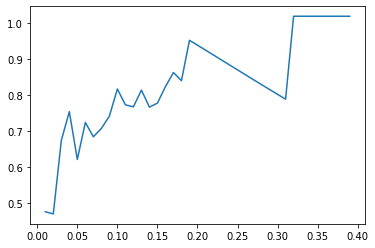

In [ ]:
naive_stoploss().plot()

In [ ]:
## Impossible to achieve in real trading situations
def cheat_stoploss(asset='SPY', start_date='2010-01-01',end_date='2021-11-01'):
    Stock = yf.download(asset, start=start_date, end=end_date,interval='1mo').dropna()
    Stock['Adj Low'] = Stock['Low'] + Stock['Adj Close'] - Stock['Close']
    Stock['Return'] = np.log(Stock['Adj Close']) - np.log(Stock['Adj Close'].shift(1))
    Stock['Low Return'] = np.log(Stock['Adj Low']) - np.log(Stock['Adj Close'].shift(1))
    Stock.dropna(inplace=True)
    results = dict()
    for threshold in range(5,40,1):
        threshold = threshold / 100
        Strategy = np.where(Stock['Return']<-1 *threshold,-1 *threshold,Stock['Return'])
        Sharpe = Strategy.mean() / Strategy.std() * np.sqrt(12)
        results[threshold] = Sharpe
    return pd.Series(results)

[*********************100%***********************]  1 of 1 completed


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

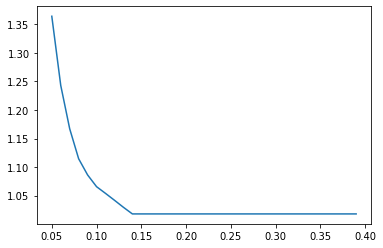

In [ ]:
cheat_stoploss().plot()

### Derivative-based strategies

Derivatives can be used to transform the payoff of a portfolio.

A collar trade structure can be used to manage drawdown of a stock portfolio. To cap the downside of a portfolio, put options can be purchased. However premium will need to be paid. It could be financed by selling a call option, which caps the upside of a portfolio. The overall effect is that the investors have both limited upside and downside on their stock portfolio.

The above trade is done by JPMorgan Hedged Equity Fund Series and very popular. Due to the massive size of its trade, some suggests it affects the market by pinning the market around these key price levels as option dealers need to delta-hedge these positions.


There are ETFs which advertise to manage drawdowns through the use of options.

- Invesco S&P 500 Downside Hedged ETF (PHDG)
- AMPLIFY BLACKSWAN GROWTH & TREASURY CORE ETF (SWAN)












In [ ]:
Stock = yf.download('SWAN', start='2018-01-01', end='2021-11-01').dropna()
Stock['Return'] = Stock['Adj Close'].pct_change()

[*********************100%***********************]  1 of 1 completed


In [ ]:
Stock['Return'].mean() / Stock['Return'].std() * np.sqrt(252)

1.0809068439560447

In [ ]:
Stock = yf.download('PHDG', start='2018-01-01', end='2021-11-01').dropna()
Stock['Return'] = Stock['Adj Close'].pct_change()

[*********************100%***********************]  1 of 1 completed


In [ ]:
Stock['Return'].mean() / Stock['Return'].std() * np.sqrt(252)

0.6870988808548111

### Volatility target strategies

Volatlity is often used as risk metric for portfolio management. Hedge Funds often have mandates stating the maximum risk, often measured by VaR, it can take overall and for each asset.

There are many ways to implement volatility target strategies. Both realised volatility and implied volatility can be used. The lookback horizon or maturity also needs to be decided. For scaling methods, one can use absolute volatility, where we scale the asset returns to a target. Or one can use relative volatility, where we scale the returns based on the ratio of more recent volatility to historical average.

We implement a volatility scale strategy using relative volatility. By changing the power exponent of the volatility measure, we can vary the leverage used in the strategy. We find the optimal sharpe ratio is achieved with around 2X leverage required, which is easily achieved.

In [ ]:
def volatility_target(asset='SPY', start_date='2008-01-01',end_date='2021-11-01'):
    Stock = yf.download(asset, start=start_date, end=end_date).dropna()
    Stock['Return'] = Stock['Adj Close'].pct_change()
    results  = dict()
    leverage = dict()
    portfolio = dict()
    for ratio in np.linspace(0.1,1.5,140):
        Stock['Volatility'] = np.power(Stock['Return'].rolling(252).std() * np.sqrt(252), ratio)
        Stock['Volatility_Ratio'] = Stock['Volatility'].rolling(252).mean() / Stock['Volatility']
        Stock['Scaled_Return'] = Stock['Return'] * Stock['Volatility_Ratio']
        sharpe = Stock['Scaled_Return'].mean() / Stock['Scaled_Return'].std() * np.sqrt(252)
        results[ratio] = sharpe
        leverage[ratio] = np.max(Stock['Volatility_Ratio'])
        portfolio[ratio] = (1+Stock['Scaled_Return']).cumprod()
    return pd.Series(results), pd.Series(leverage), pd.DataFrame(portfolio)

In [ ]:
sharpe, leverage, portfolio = volatility_target()

[*********************100%***********************]  1 of 1 completed


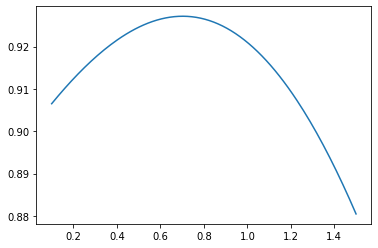

In [ ]:
sharpe.plot()

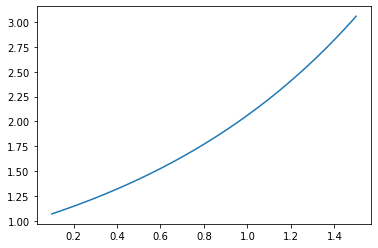

In [ ]:
leverage.plot()

### Are these drawdown managed strategies beneficial?

We now compare the correlation of the strategies mentioned above. Volatility targeting strategies have a high correlation with Long-only trend following strategies (>0.9). However, SWAN ETF has a low correlation with the above strategies. This is due to the fact that it holds a large portion of portfolio in bonds.


All the strategies we discussed above is a form of portfolio insurance, which refers to the fact that these strategies will short the market after it starts to fall. When everyone follows the same strategy, it fails to perform due to crowding. Portfolio insurance is believed to be one of the causes of the market crash in 1987. A small decline can quickly lead to a crash due to market participants all short the market at the same time, until a value investor willing to buy the assets at a discount or government intervenue the stablise the market (Example: short-sell ban).

SWAN and other derivative-based strategies relies on the fact that stocks and bonds are negatively correlated. When both stocks and bonds fall, SWAN will performly badly as SPY.



In [ ]:
## Derivative based
SWAN = yf.download('SWAN', start='2018-01-01', end='2021-11-01').dropna()
SWAN['Return'] = SWAN['Adj Close'].pct_change()
SWAN['Portfolio'] = (1+SWAN['Return']).cumprod()
SWAN['Return'].mean() / SWAN['Return'].std() * np.sqrt(252)

[*********************100%***********************]  1 of 1 completed


1.0809070595213706

In [ ]:
## Volatility Target
sharpe, leverage, portfolio = volatility_target(start_date='2017-01-01', end_date='2021-11-01')

[*********************100%***********************]  1 of 1 completed


In [ ]:
## Trend Following (Long only)
Trend = yf.download('SPY', start='2018-01-01', end='2021-11-01').dropna()
Trend['Return'] = Trend['Adj Close'].pct_change()
Trend['Forward_Return'] = Trend['Return'].shift(-2)
Trend['Return_5'] = Trend['Return'].rolling(5).mean()
Trend['Return_60'] = Trend['Return'].rolling(60).mean()
Trend['Portfolio_Return'] = np.where(Trend['Return_5']>Trend['Return_60'],Trend['Forward_Return'],0)
Trend['Portfolio'] = (1+Trend['Portfolio_Return']).cumprod()
Trend['Portfolio_Return'].mean() / Trend['Portfolio_Return'].std() * np.sqrt(252)

[*********************100%***********************]  1 of 1 completed


0.5502494335781705

In [ ]:
np.corrcoef(SWAN['Return'].loc['2020-01-01':'2021-10-01'],Trend['Portfolio_Return'].loc['2020-01-01':'2021-10-01'])

array([[1.        , 0.13066262],
       [0.13066262, 1.        ]])

In [ ]:
np.corrcoef(portfolio.loc['2020-01-01':'2021-10-01'].iloc[:,0],Trend['Portfolio'].loc['2020-01-01':'2021-10-01'])

array([[1.        , 0.93786304],
       [0.93786304, 1.        ]])




### Recommended Readings

- JPMorgan Hedged Equity Fund Series https://am.jpmorgan.com/content/dam/jpm-am-aem/americas/us/en/supplemental/fund-announcement/hedged-equity-reset-faq-2021-series-v2.pdf
- Artemis Capital Management https://share.streamlit.io/jpartemis/cwarp/main/cwarp_app.py




## Lecture 5 Replicating Options

We will introduce Black-Scholes pricing model for European Options and a very crude model of simulating option prices using realised volatility.

Assuming interest rates to be zero, we use historical volatility of an asset and a decision rule for the strike to derive the theorectical price and delta of the corresponding European option. We then use the delta to replicate the payoff of the strategy.

- Strike: methods to determine strike price of option
- Maturity: measured in percentage of a year (Example: 0.5 = 6-months)
- Volatility: lookback period for historical volatility (Example: 0.5 = 6-months)
- Volatility multiplier: for OTM options, we recommend to scale up the volatility due to volatility smile
- moneyness: for strike that is fixed at the year/quarter start, a multipler for creating OTM options
- Hedge Ratio: a parameter used to reduce directional exposure from the option to achieve market neutral portfolio
- Lookback: number of trading days to lookback when the strike is determined by lookback

We will demonstrate various option strategies that are popular with investors and explore their correlation.

As suggested by Christopher Cole, all trades are Long/Short volatility/correlation/dispersion of different assets. We demonstrate this by using our naive option replication model. We suggest any systematic price-based strategies can be expressed as a linear combination of option strategies.





In [ ]:
from scipy.stats import norm
### The input is percentage return
### Interest rates is assumed to be zero
def option_replicate(stock, option_type='call', strike_type='fixed_quarter', moneyness=1, maturity=1, historical_vol = 1, vol_multiplier=1, hedge_ratio=0, lookback=252, clip=1):
    ### Create price series
    df = pd.DataFrame(stock).copy()
    df.columns = ['return']
    df['adjusted_price'] = (1+df['return']).cumprod()
    df['log_return'] = np.log(1+df['return'])
    ## -2 for buy at next day close, -1 for buy at same day close
    df['forward_return'] = df['return'].shift(-2)
    df['vol'] = df['log_return'].rolling(int(historical_vol*252)).std() * np.sqrt(252)
    df['maturity'] = maturity
    ### Create Strike
    if strike_type == 'fixed_quarter':
        temp = np.zeros(df['adjusted_price'].shape[0])
        for i in range(0,temp.shape[0]):
            location = i - i % 60
            temp[i] = df['adjusted_price'].iloc[location]
        df['strike'] = temp * moneyness
    if strike_type == 'fixed_year':
        temp = np.zeros(df['adjusted_price'].shape[0])
        for i in range(0,temp.shape[0]):
            location = i - i % 252
            temp[i] = df['adjusted_price'].iloc[location]
        df['strike'] = temp * moneyness
    if strike_type == 'lookback':
        temp = np.zeros(df['adjusted_price'].shape[0])
        for i in range(0,temp.shape[0]):
            location = max(i-lookback,0)
            temp[i] = df['adjusted_price'].iloc[location]
        df['strike'] = temp * moneyness
    ## Volatility smile adjustement
    df['moneyness'] = df['strike'] / df['adjusted_price']
    df['vol'] = df['vol'] * np.power((1 + np.abs(df['moneyness']-1)), vol_multiplier)
    ## Calculate Option delta
    df['d1'] = 1/(df['vol']*np.sqrt(df['maturity'])) * (np.log(df['adjusted_price']) - np.log(df['strike']) + df['vol']*df['vol']/2 * df['maturity'])
    df['d2'] = df['d1'] - df['vol']*np.sqrt(df['maturity'])
    df['delta_call'] = norm.cdf(df['d1'])
    if option_type == 'call':
        df['delta'] = df['delta_call']
    else:
        df['delta'] = df['delta_call'] - 1
    ## Other Greeks
    df['gamma'] = norm.pdf(df['d1']) / (df['adjusted_price'] * df['vol']* np.sqrt(df['maturity']))
    df['vega'] = df['adjusted_price'] * norm.pdf(df['d1']) * np.sqrt(df['maturity'])
    df['theta'] = -1 *  norm.pdf(df['d1']) * df['vol']  * df['adjusted_price'] / (2*np.sqrt(df['maturity']))
    ## Theorectical price
    if option_type == 'call':
        df['bsprice'] = norm.cdf(df['d1']) * df['adjusted_price'] - norm.cdf(df['d2']) * df['strike']
        df['intrinsic_value'] = np.maximum(df['adjusted_price']-df['strike'],0)
    else:
        df['bsprice'] = norm.cdf(df['d1']) * df['adjusted_price'] - norm.cdf(df['d2']) * df['strike'] + df['strike'] - df['adjusted_price']
        df['intrinsic_value'] = np.maximum(df['strike']-df['adjusted_price'],0)
    df['time_value'] = df['bsprice'] - df['intrinsic_value']

    ## Rebalance
    df['hedged_delta'] = df['delta'] - hedge_ratio * df['delta'].rolling(252).mean()
    ## Reduce turnover
    df['hedged_delta'] = df['hedged_delta'].rolling(10).mean().clip(lower=-1*clip,upper=clip)
    df['option_forward_return'] = df['hedged_delta'] * df['forward_return']
    return df[['delta','gamma','vega','theta', 'hedged_delta','option_forward_return','forward_return','moneyness','intrinsic_value','bsprice','adjusted_price']].dropna()

In [ ]:
## Input is pandas series of pct return of a strategy
def strategy_metrics(strategy, interval=1):
    results = dict()
    results['sharpe'] = strategy.mean() / strategy.std() * np.sqrt(252/interval)
    results['mean'] = strategy.mean() * 252 / interval
    results['volatility'] = strategy.std() * np.sqrt(252/interval)
    results['skew'] = strategy.skew()
    results['kurtosis'] = strategy.kurtosis()
    portfolio = (1+strategy).cumprod()
    dd = (portfolio - portfolio.cummax()) / portfolio.cummax()
    results['max_drawdown'] = -1 * dd.cummin().min()
    results['calmar'] = results['mean'] / results['max_drawdown']
    return results

def combine_strategy(strategy,hedge_asset):
    results = list()
    ratios = np.linspace(-0.2,0,11)
    for ratio in ratios:
        result = strategy_metrics(strategy+ratio*hedge_asset)
        results.append(result)
    return pd.DataFrame.from_records(results,index=ratios)


### Call Options

Combining various options can improve Sharpe Ratio and RMDD.

We provide two examples of option strategies involving call options
- Call Spread
- Butterfly Spread

In [ ]:
SPY = yf.download('SPY',start='1995-01-01',end='2024-02-01')
SPY['Return'] = SPY['Adj Close'].pct_change()

[*********************100%%**********************]  1 of 1 completed


In [ ]:
strategy_metrics(SPY['Return'])

{'sharpe': 0.611725507845909,
 'mean': 0.11743933479155641,
 'volatility': 0.19198044430924543,
 'skew': -0.05842450472689749,
 'kurtosis': 10.911798585734498,
 'max_drawdown': 0.5518944974520817,
 'calmar': 0.2127930887764524}

In [ ]:
def call_spread(stock):
    ## Call Spread
    option_1 = option_replicate(stock, strike_type='fixed_year', moneyness=1.1, vol_multiplier=1, hedge_ratio=0)
    option_2 = option_replicate(stock, strike_type='fixed_year', moneyness=1.2, vol_multiplier=1, hedge_ratio=0)
    strategy = option_1 - option_2
    return strategy_metrics(strategy['option_forward_return']), strategy

In [ ]:
result, strat = call_spread(SPY['Return'])

In [ ]:
result

{'sharpe': 0.6545600666925675,
 'mean': 0.014931045890102813,
 'volatility': 0.02281081087874491,
 'skew': -0.49825397188420634,
 'kurtosis': 4.762689266306914,
 'max_drawdown': 0.05703730977204535,
 'calmar': 0.26177682555113585}

In [ ]:
def butterfly_spread(stock, money1=1, money2=1.1, money3=1.2):
    ## Butterfly
    option_1 = option_replicate(stock, strike_type='fixed_quarter', moneyness=money1, vol_multiplier=money1, hedge_ratio=0, clip=1)
    option_2 = option_replicate(stock, strike_type='fixed_quarter', moneyness=money2, vol_multiplier=money2, hedge_ratio=0, clip=1)
    option_3 = option_replicate(stock, strike_type='fixed_quarter', moneyness=money3, vol_multiplier=money3, hedge_ratio=0, clip=1)
    strategy = (option_1 + option_3 - 2 * option_2)
    return strategy_metrics(strategy['option_forward_return']), strategy

def butterfly_spread_search(stock):
    results = dict()
    for ratio in np.linspace(0.01,0.2,20):
        result, _ = butterfly_spread(stock,1,1+ratio,1+2*ratio)
        results[ratio] = result
    return pd.DataFrame.from_records(results).transpose()

In [ ]:
result, strat = butterfly_spread(SPY['Return'])

In [ ]:
result

{'sharpe': 0.6262661973155454,
 'mean': 0.008674904129938904,
 'volatility': 0.013851784061032496,
 'skew': -0.6000863776874853,
 'kurtosis': 7.270416806582774,
 'max_drawdown': 0.03321587374062779,
 'calmar': 0.2611674224703067}

<Axes: xlabel='Date'>

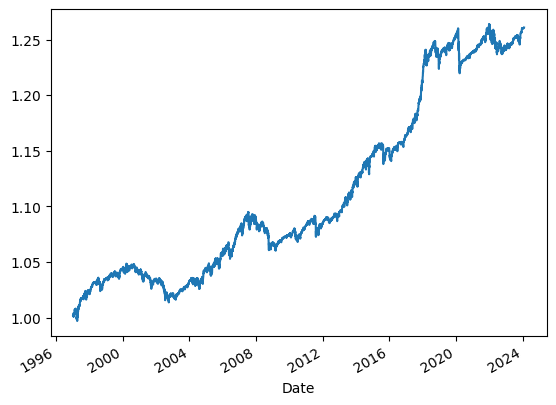

In [ ]:
(1+strat['option_forward_return']).cumprod().plot()

<Axes: xlabel='Date'>

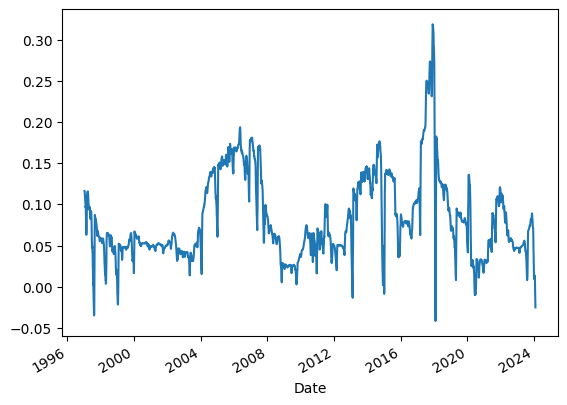

In [ ]:
strat['hedged_delta'].plot()

In [ ]:
## Butterfly Spread outperformed after 2010
SPY = yf.download('SPY',start='2010-01-01',end='2030-12-01')
SPY['Return'] = SPY['Adj Close'].pct_change()

[*********************100%%**********************]  1 of 1 completed


In [ ]:
strategy_metrics(SPY['Return'])

{'sharpe': 0.8091803522792993,
 'mean': 0.1398605832168327,
 'volatility': 0.17284228765920157,
 'skew': -0.5088438334705864,
 'kurtosis': 10.76806169805811,
 'max_drawdown': 0.33717255318654354,
 'calmar': 0.4148041763632334}

<Axes: >

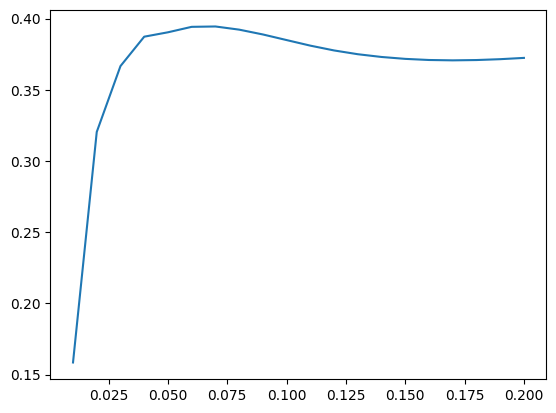

In [ ]:
butterfly_spread_search(SPY['Return'])['calmar'].plot()

In [ ]:
## Butterfly Spread underperformed before 2010
SPY = yf.download('SPY',start='1996-01-01',end='2010-12-01')
SPY['Return'] = SPY['Adj Close'].pct_change()

[*********************100%***********************]  1 of 1 completed


In [ ]:
strategy_metrics(SPY['Return'])

{'RMDD': 0.1495213902983672,
 'kurtosis': 9.521129830419685,
 'max_drawdown': 0.5518943534884668,
 'mean': 0.08252001103141408,
 'sharpe': 0.38811525097198885,
 'skew': 0.18627793516924332,
 'volatility': 0.21261728526449927}

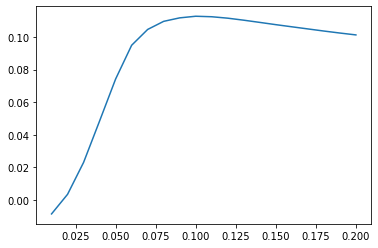

In [ ]:
butterfly_spread_search(SPY['Return'])['RMDD'].plot()

### Put Options

Constant rolling put options cannot be used to hedge against market drawdowns as put options have a high premium.


Modelling the volatility smile of put options are difficult, we warn the parameters assumptions we use here might NOT correspond well to the actual traded options.

We demonstrate two strategies involving put options
- Put Butterfly Spread
- Short OTM Put  

In [ ]:
option_sample = option_replicate(SPY['Return'], option_type='put', strike_type='fixed_year', moneyness=0.9, vol_multiplier=1.2)

<Axes: xlabel='Date'>

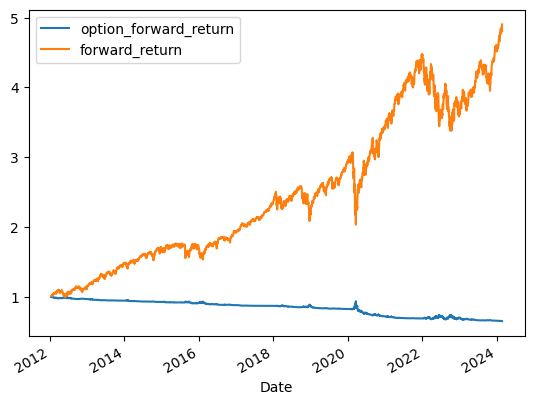

In [ ]:
(1+option_sample[['option_forward_return','forward_return']]).cumprod().plot()

In [ ]:
## Hedging stocks with put options without rebalancing is NOT possible
combine_strategy(option_sample['forward_return'],option_sample['option_forward_return'],)

,sharpe,mean,volatility,skew,kurtosis,max_drawdown,RMDD
-0.20,0.254981,0.060403,0.236892,0.326340,11.317408,0.585117,0.103232
-0.18,0.255512,0.060057,0.235047,0.318457,11.135126,0.581858,0.103216
-0.16,0.256048,0.059711,0.233204,0.310507,10.952264,0.578585,0.103203
-0.14,0.256590,0.059366,0.231364,0.302492,10.768866,0.575298,0.103191
-0.12,0.257137,0.059020,0.229527,0.294411,10.584975,0.571996,0.103182
-0.10,0.257690,0.058674,0.227693,0.286265,10.400641,0.568681,0.103176
-0.08,0.258249,0.058328,0.225862,0.278055,10.215913,0.565351,0.103172
-0.06,0.258813,0.057983,0.224033,0.269779,10.030846,0.562008,0.103171
-0.04,0.259383,0.057637,0.222208,0.261440,9.845496,0.558650,0.103172
-0.02,0.259958,0.057291,0.220386,0.253038,9.659923,0.555279,0.103175


In [ ]:
def active_longvol(stock):
    ## Put Butterfly Spread
    option_1 = option_replicate(stock, option_type='put', strike_type='fixed_year', moneyness=1, vol_multiplier=1, hedge_ratio=0)
    option_2 = option_replicate(stock, option_type='put', strike_type='fixed_year', moneyness=0.9, vol_multiplier=1.15, hedge_ratio=0)
    option_3 = option_replicate(stock, option_type='put', strike_type='fixed_year', moneyness=0.8, vol_multiplier=1.3, hedge_ratio=0)
    strategy = option_1 + option_3 - 2 * option_2
    return strategy_metrics(strategy['option_forward_return']), strategy

In [ ]:
result, strat = active_longvol(SPY['Return'])

In [ ]:
result

{'sharpe': -0.4503906644965479,
 'mean': -0.0058099101491224815,
 'volatility': 0.012899712643060373,
 'skew': 1.5846805722016764,
 'kurtosis': 19.19590094974491,
 'max_drawdown': 0.08721329688193896,
 'calmar': -0.0666172516902713}

In [ ]:
def short_put(stock):
    ## Short Put at 10% and 20% relative to current price
    option_1 = option_replicate(stock, option_type='put', strike_type='lookback', maturity=1, moneyness=0.9, vol_multiplier=1.1, hedge_ratio=0, lookback=5)
    option_2 = option_replicate(stock, option_type='put', strike_type='lookback', maturity=1, moneyness=0.8, vol_multiplier=1.2, hedge_ratio=0, lookback=5)
    strategy = -(option_1 + option_2)
    return strategy_metrics(strategy['option_forward_return']), strategy

In [ ]:
stock = yf.download('QQQ',start='1999-01-01',end='2019-12-01')
stock['Return'] = stock['Adj Close'].pct_change().dropna()

[*********************100%%**********************]  1 of 1 completed


In [ ]:
result, strat = short_put(stock['Return'])

In [ ]:
result

{'sharpe': 0.41152043143522915,
 'mean': 0.051356952864581085,
 'volatility': 0.12479806333179443,
 'skew': 0.5389447760756401,
 'kurtosis': 14.16167936470612,
 'max_drawdown': 0.3961359546264588,
 'calmar': 0.12964476530035943}

<Axes: xlabel='Date'>

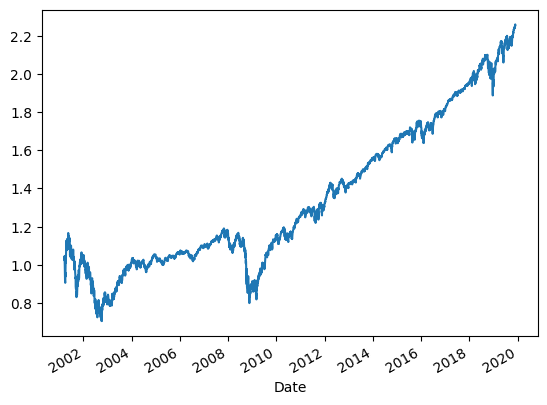

In [ ]:
(1+strat['option_forward_return']).cumprod().plot()

In [ ]:
stock = yf.download('QQQ',start='2015-01-01',end='2030-12-01')
stock['Return'] = stock['Adj Close'].pct_change().dropna()

[*********************100%%**********************]  1 of 1 completed


In [ ]:
result, strat = short_put(stock['Return'])

In [ ]:
result

{'sharpe': 0.8529100682858758,
 'mean': 0.09998722279607376,
 'volatility': 0.1172306747381019,
 'skew': -0.21388965133467272,
 'kurtosis': 11.198480108297428,
 'max_drawdown': 0.17490434658806064,
 'calmar': 0.5716680273908019}

<Axes: xlabel='Date'>

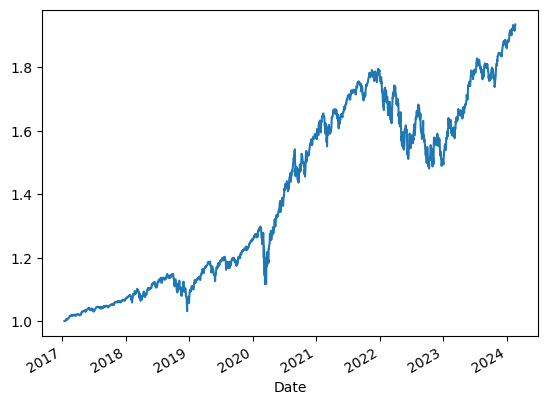

In [ ]:
(1+strat['option_forward_return']).cumprod().plot()

### Trend Following

Trend Following strategies can be modelled be the return of a long straddle/ long strangle.

Buy-and-hold commodities is not a good strategy. However, commodities trend following can provide a much better RMDD than equities, where sharpe ratio is comprable or slightly worse.



In [ ]:
stock = yf.download('SPY',start='1990-01-01',end='2030-12-01')
stock['Return'] = stock['Adj Close'].pct_change().dropna()

[*********************100%%**********************]  1 of 1 completed


In [ ]:
strategy_metrics(stock['Return'])

{'sharpe': 0.6124914971048859,
 'mean': 0.11481380307837992,
 'volatility': 0.18745370935119884,
 'skew': -0.058529606638314524,
 'kurtosis': 11.35035053234321,
 'max_drawdown': 0.551894599853014,
 'calmar': 0.20803574289177362}

In [ ]:
def trend_following(stock, strike_type='lookback', maturity=1, historical_vol=1, lookback=252, hedge_ratio=0):
    option_1 = option_replicate(stock, option_type='call', strike_type=strike_type, vol_multiplier=1, hedge_ratio=hedge_ratio, maturity=maturity, historical_vol=historical_vol, lookback=lookback)
    option_2 = option_replicate(stock, option_type='put', strike_type=strike_type, vol_multiplier=1, hedge_ratio=hedge_ratio,  maturity=maturity, historical_vol=historical_vol, lookback=lookback)
    strategy = option_1 + option_2
    return strategy_metrics(strategy['option_forward_return']) , strategy

In [ ]:
stock = yf.download('QQQ',start='1990-01-01',end='2030-12-01')
stock['Return'] = stock['Adj Close'].pct_change().dropna()

[*********************100%%**********************]  1 of 1 completed


In [ ]:
result, strat = trend_following(stock['Return'], strike_type='lookback',lookback=252,hedge_ratio=0)

In [ ]:
result

{'sharpe': 0.5625656751144492,
 'mean': 0.06609740865129972,
 'volatility': 0.11749278630953226,
 'skew': -0.6886397472326621,
 'kurtosis': 8.968043014318356,
 'max_drawdown': 0.21933797362372212,
 'calmar': 0.3013495910411341}

<Axes: xlabel='Date'>

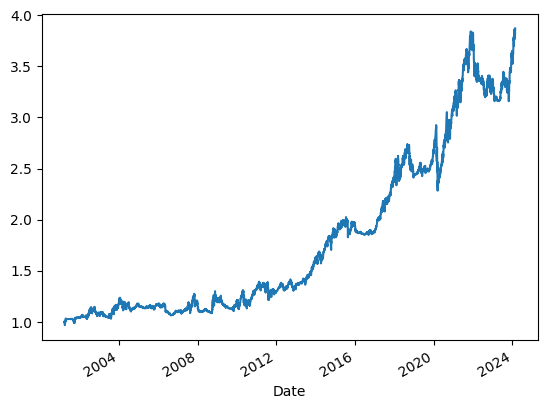

In [ ]:
(1+strat['option_forward_return']).cumprod().plot()

<Axes: xlabel='Date'>

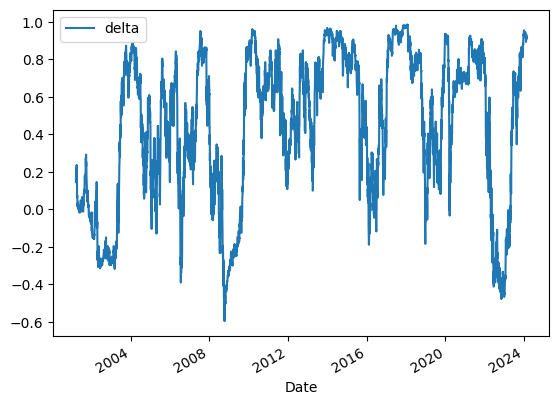

In [ ]:
strat[['delta']].plot()

We can study the effect of lookback on the performance of strategy.

For Equity Market, medium and slow strategies (>252 days) outperform fast strategies.

The optimal number of lookback depends on asset classes and market regimes.

In [ ]:
def trend_following_lookback(stock):
    results = dict()
    lookback_1 = [63*i for i in range(5,9)]
    lookback_2 = [21*i for i in range(3,13)]
    lookback_3 = [5*i for i in range(1,11)]
    lookbacks = lookback_1 + lookback_2 + lookback_3
    for lookback in lookbacks:
        result, strat = trend_following(stock, strike_type='lookback', maturity=1, historical_vol=1, lookback=lookback)
        results[lookback] = result
    return pd.DataFrame.from_records(results).transpose()

In [ ]:
stock = yf.download('QQQ',start='1990-01-01',end='2030-12-01')
stock['Return'] = stock['Adj Close'].pct_change().dropna()

[*********************100%%**********************]  1 of 1 completed


<Axes: >

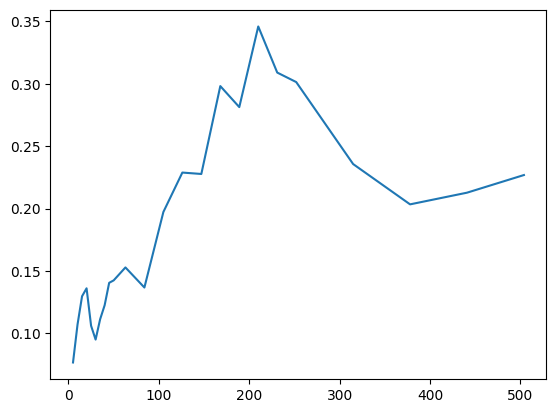

In [ ]:
trend_following_lookback(stock['Return'])['calmar'].plot()

In [ ]:
def long_strangle(stock, strike_type='lookback', maturity=1, historical_vol=1, lookback=63, gapsize=0.1):
    option_1 = option_replicate(stock, option_type='call', strike_type=strike_type, moneyness=1+gapsize, vol_multiplier=1, hedge_ratio=0, maturity=maturity, historical_vol=historical_vol, lookback=lookback)
    option_2 = option_replicate(stock, option_type='put', strike_type=strike_type, moneyness=1-gapsize, vol_multiplier=1, hedge_ratio=0,  maturity=maturity, historical_vol=historical_vol, lookback=lookback)
    strategy = option_1 + option_2
    return strategy_metrics(strategy['option_forward_return']) , strategy

def long_strangle_gap(stock):
    results = dict()
    lookback_1 = [63*i for i in range(5,13)]
    lookback_2 = [21*i for i in range(3,13)]
    lookbacks = [5,10,21,30,42,50] + lookback_1 + lookback_2
    for lookback in lookbacks:
        for gap in np.linspace(0,0.1,5):
            result, strat = long_strangle(stock, strike_type='lookback', maturity=1, historical_vol=1,  gapsize=gap, lookback=lookback)
            results[(gap,lookback)] = result
    df = pd.DataFrame.from_records(results).transpose()
    df.index = pd.MultiIndex.from_tuples(df.index)
    return df

In [ ]:
result, strat = long_strangle(stock['Return'], strike_type='lookback', gapsize=0.4)

In [ ]:
result

{'sharpe': 0.4323561304360972,
 'mean': 0.020789603587743503,
 'volatility': 0.04808444271802972,
 'skew': -0.2281488533460504,
 'kurtosis': 10.210455936774652,
 'max_drawdown': 0.18821019989290222,
 'calmar': 0.11045949475412847}

<Axes: xlabel='Date'>

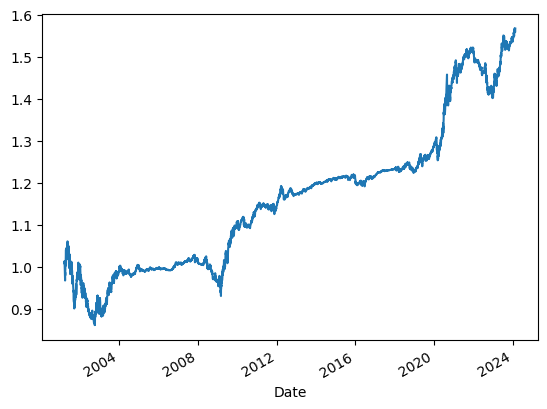

In [ ]:
(1+strat['option_forward_return']).cumprod().plot()

In [ ]:
backtest = long_strangle_gap(stock['Return'])

In [ ]:
backtest.sort_values('calmar').tail(10)

,,sharpe,mean,volatility,skew,kurtosis,max_drawdown,calmar
0.000,231,0.553012,0.062553,0.113113,-0.649065,8.058009,0.202466,0.308954
0.025,231,0.553717,0.062412,0.112714,-0.650057,8.076895,0.201646,0.309511
0.050,231,0.555664,0.061977,0.111536,-0.652884,8.131048,0.199226,0.311087
0.075,231,0.558516,0.061230,0.109630,-0.657134,8.216192,0.195329,0.313471
0.100,231,0.561753,0.060143,0.107063,-0.662357,8.325303,0.190197,0.316216
0.000,210,0.590506,0.063211,0.107045,-0.635458,7.189372,0.182756,0.345874
0.025,210,0.591145,0.063028,0.106620,-0.636244,7.203034,0.181044,0.348135
0.050,210,0.593029,0.062483,0.105363,-0.638295,7.240384,0.175834,0.355352
0.075,210,0.595615,0.061547,0.103333,-0.641310,7.300345,0.167841,0.366695
0.100,210,0.598417,0.060206,0.100609,-0.644724,7.382192,0.162075,0.371472


### Collar Trade

A Collar Trade involves buying the underlying stock, sell an OTM call option and buy and OTM put options. The overall trade caps both upside and downside

In [ ]:
SPY = yf.download('SPY',start='1990-01-01',end='2030-12-01')
SPY['Return'] = SPY['Adj Close'].pct_change()

[*********************100%***********************]  1 of 1 completed


In [ ]:
def collar_trade(stock, strike_type='fixed_quarter', maturity=1, historical_vol=1, lookback=252, hedge_ratio=0):
    ## Synthetic Long stock by long call and short put at the same strike
    option_0 = option_replicate(stock, option_type='call', strike_type=strike_type, moneyness=1, vol_multiplier=1, hedge_ratio=hedge_ratio, maturity=maturity, historical_vol=historical_vol, lookback=lookback)
    option_1 = option_replicate(stock, option_type='put', strike_type=strike_type, moneyness=1, vol_multiplier=1, hedge_ratio=hedge_ratio, maturity=maturity, historical_vol=historical_vol, lookback=lookback)
    option_2 = option_replicate(stock, option_type='put', strike_type=strike_type, moneyness=0.9, vol_multiplier=1, hedge_ratio=hedge_ratio,  maturity=maturity, historical_vol=historical_vol, lookback=lookback)
    option_3 = option_replicate(stock, option_type='call', strike_type=strike_type, moneyness=1.1, vol_multiplier=1, hedge_ratio=hedge_ratio,  maturity=maturity, historical_vol=historical_vol, lookback=lookback)
    strategy = option_0 - option_1 + option_2 - option_3
    return strategy_metrics(strategy['option_forward_return'] ), strategy



In [ ]:
result, strat = collar_trade(SPY['Return'])

In [ ]:
result

{'RMDD': 0.2524652933845203,
 'kurtosis': 4.231013616554733,
 'max_drawdown': 0.19259537222764406,
 'mean': 0.04862364715395305,
 'sharpe': 0.7232753599337274,
 'skew': -0.514474035483832,
 'volatility': 0.06722702009150204}

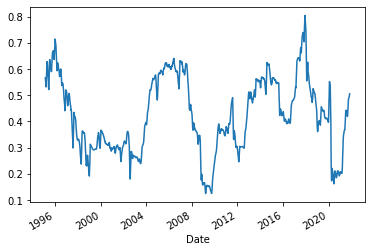

In [ ]:
strat['delta'].rolling(21).mean().plot()

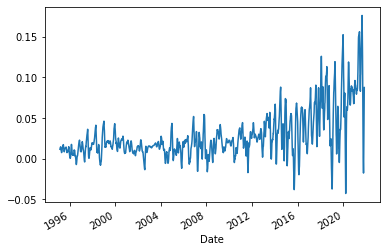

In [ ]:
strat['theta'].rolling(21).mean().plot()

### Volatility Target strategies

We now compare the correlation between volatility target strategies with trend following and other option strategies.

We consider the strategy performance before and after 2010.

Volatility Targeting performs well both before and after 2010. Trend Following outperforms other strategies slightly after 2010. Volatility Targeting gives a better Sharpe Ratio. Trend Following gives a better RMDD.

In [ ]:
## Given daily return of a strategy, calculate the vol-target position (capped at 3x leverage) and vol-target returns
def volatility_target(stock, interval=1, vol_lookback=252, vol_target=0.2, vol_power=2):
    df = pd.DataFrame(stock).copy()
    df.columns = ['return']
    df['forward_return'] = df['return'].shift(-2)
    volatility = stock.rolling(vol_lookback).std() * np.sqrt(252/interval)
    df['delta']  = np.clip(np.power(vol_target/volatility,vol_power),-3,3)
    df['voladj_forward_return'] = df['delta'] * df['forward_return']
    return strategy_metrics(df['voladj_forward_return'],interval=interval), df.dropna()

def volatility_target_hyperopt(stock,interval=1):
    results = dict()
    for vol_target in np.linspace(0.1,0.2,11):
        for vol_lookback in range(63,63*9,63):
            strategy = volatility_target(stock,interval=interval,vol_lookback=vol_lookback,vol_target=vol_target,vol_power=2)
            performance = strategy_metrics(strategy['voladj_forward_return'],interval=interval)
            results[(vol_target,vol_lookback)] = performance
    df = pd.DataFrame.from_records(results).transpose()
    df.index = pd.MultiIndex.from_tuples(df.index, names=('target', 'lookback'))
    return df

### Benchmark

In [ ]:
def strategy_benchmark(ticker='SPY',start_date='1995-01-01',end_date='2030-12-31'):
    stock = yf.download(ticker,start=start_date,end=end_date)
    stock['Return'] = stock['Adj Close'].pct_change()
    result1, strat1 = volatility_target(stock['Return'],vol_target=0.2,)
    result2, strat2 = trend_following(stock['Return'])
    result3, strat3 = butterfly_spread(stock['Return'],money1=1,money2=1.1,money3=1.2)
    metrics = pd.DataFrame([result1, result2, result3, strategy_metrics(stock['Return'])]).transpose()
    metrics.columns = ['vol_target','trend_following', 'butterfly', 'original']
    strats = pd.concat([strat1['voladj_forward_return'],strat2['option_forward_return'],strat3['option_forward_return'], strat2['forward_return']],axis=1).dropna()
    strats.columns = metrics.columns
    return metrics, strats


In [ ]:
## From 1995 to 2024
metrics, strats = strategy_benchmark()

[*********************100%%**********************]  1 of 1 completed


In [ ]:
metrics

,vol_target,trend_following,butterfly,original
sharpe,0.632249,0.510802,0.628632,0.619157
mean,0.174178,0.053235,0.087049,0.118794
volatility,0.275490,0.104218,0.138474,0.191864
skew,-0.626995,-0.814268,-0.596991,-0.058996
kurtosis,5.825851,12.987293,7.266598,10.915150
max_drawdown,0.491873,0.204960,0.297765,0.551895
calmar,0.354112,0.259732,0.292343,0.215247


In [ ]:
strats.corr()

,vol_target,trend_following,butterfly,original
vol_target,1.000000,0.621480,0.953655,0.823043
trend_following,0.621480,1.000000,0.531988,0.316730
butterfly,0.953655,0.531988,1.000000,0.846856
original,0.823043,0.316730,0.846856,1.000000


In [ ]:
metrics, corrs = strategy_benchmark(ticker="SPY",start_date='1995-01-01',end_date='2010-12-31')

[*********************100%%**********************]  1 of 1 completed


In [ ]:
metrics

,vol_target,trend_following,butterfly,original
sharpe,0.570245,0.520218,0.431171,0.492691
mean,0.149153,0.060053,0.057577,0.101766
volatility,0.261559,0.115439,0.133536,0.206550
skew,-0.352788,-0.657153,-0.310429,0.175921
kurtosis,3.967826,12.849077,4.370207,10.110010
max_drawdown,0.478784,0.152000,0.297764,0.551894
calmar,0.311525,0.395087,0.193364,0.184393


In [ ]:
metrics, corrs = strategy_benchmark(ticker="SPY",start_date='2010-01-01',end_date='2030-12-31')

[*********************100%%**********************]  1 of 1 completed


In [ ]:
metrics

,vol_target,trend_following,butterfly,original
sharpe,0.694728,0.616688,0.859471,0.807718
mean,0.201965,0.054192,0.122434,0.139572
volatility,0.290710,0.087876,0.142452,0.172797
skew,-0.853575,-1.026187,-0.772476,-0.508652
kurtosis,7.065120,9.772539,9.232770,10.774440
max_drawdown,0.474800,0.204960,0.290103,0.337173
calmar,0.425368,0.264403,0.422034,0.413947


In [ ]:
corrs

,vol_target,trend_following,butterfly,original
Date,,,,
2012-01-17,0.003976,0.000971,0.000638,0.010553
2012-01-18,0.002803,0.000693,0.000392,0.007455
2012-01-19,-0.001940,-0.000495,-0.000225,-0.005153
2012-01-20,-0.000858,-0.000229,-0.000079,-0.002280
2012-01-23,0.006299,0.001739,0.000425,0.016735
...,...,...,...,...
2024-02-15,-0.014232,-0.004703,-0.004488,-0.011011
2024-02-16,0.002337,0.000775,0.000737,0.001812
2024-02-20,0.054007,0.017813,0.016835,0.041391


### Risk Parity



In [ ]:
#### https://thequantmba.wordpress.com/2016/12/14/risk-parityrisk-budgeting-portfolio-in-python/


import numpy as np
from scipy.optimize import minimize


def calculate_risk_contribution(w,V):
    sigma = np.sqrt(np.matmul(w,(np.matmul(V,w.T))))
    MRC = np.matmul(V,w.T)
    RC = np.multiply(MRC,w.T)/sigma
    return RC

def risk_budget_objective(x,pars):
    # calculate portfolio risk
    V = pars[0]# covariance table
    x_t = pars[1] # risk target in percent of portfolio risk
    sig_p =  np.sqrt(np.matmul(x,(np.matmul(V,x.T)))) # portfolio sigma
    risk_target = np.asmatrix(np.multiply(sig_p,x_t))
    asset_RC = calculate_risk_contribution(x,V)
    J = np.sum(np.square(asset_RC-risk_target.T)) # sum of squared error
    return J

def total_weight_constraint(x):
    return np.sum(x)-1.0

def long_only_constraint(x):
    return x

def risk_parity(asset_returns):
    no_assets = asset_returns.shape[1]
    V = np.cov(asset_returns,rowvar=False) * np.sqrt(252)
    ## Equal risk
    x_t = np.ones((no_assets,)) / no_assets
    w0 = np.ones((no_assets,)) / no_assets
    res= minimize(risk_budget_objective, w0, args=[V,x_t], options={'disp':False}, )
    return res.x

## DataFrame of asset returns
def risk_parity_rebalance(asset_returns,rebalance_freq=63):
    dates = asset_returns.index
    assets = asset_returns.columns
    end = asset_returns.shape[0] // rebalance_freq
    rebalance = list()
    for i in range(rebalance_freq, end*rebalance_freq+1 ,rebalance_freq):
        rebalance_dates = dates[i]
        rebalance_weights = risk_parity(asset_returns.iloc[i-rebalance_freq:i,:].values)
        rebalance_entry = dict(zip(assets,rebalance_weights))
        rebalance_entry['Date'] = rebalance_dates
        rebalance.append(rebalance_entry)
    ans = pd.DataFrame.from_records(rebalance).set_index('Date')
    ## Normalise weights to sum over 1
    asset_weights = np.divide(ans, ans.sum(axis=1).values.reshape(-1,1),)
    ## Rebalance forward returns
    forward_returns = asset_returns.shift(-2)
    asset_weights = asset_weights.reindex(forward_returns.index,method='pad').dropna()
    portfolio_return = (asset_weights * forward_returns).sum(axis=1).reindex(asset_weights.index)
    return asset_weights, portfolio_return



In [ ]:
start_date = '2010-01-01'
end_date = '2021-11-01'
assets = yf.download("TLT SPY", start=start_date, end=end_date)

[*********************100%***********************]  2 of 2 completed


In [ ]:
asset_returns = assets['Adj Close'].pct_change().dropna()

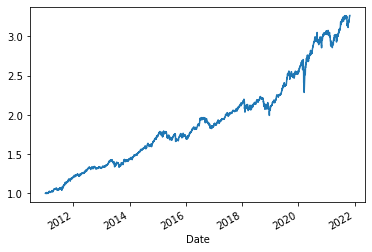

In [ ]:
(1+risk_parity_rebalance(asset_returns,252)[1]).cumprod().plot()

### Recommended Readings

- Arbitrage Theory in Continuous Time (Tomas Björk 2019)
-

## Lecture 6 Portfolio Optimisation

We will consider different portfolio optimisation methods.

Examples of portfolio construction

- 60/40 Stock/Bond
- Mean-Variance portfolio optimisation
- Volatility Scaling / Risk Parity

There are other portfolio optimisation methods such as Black-Litterman which can incoporate our guess on portfolio returns.

The key aim of portfolio optimisation is to combine negatively correalted/uncorrealted strategies that have a long term positive return to form a balanced portfolio. This reduce volatility and can improve the skewness of portfolio.






### Correlation between bond and stocks

Bond and stocks have a negative correlation since 2010. When bond and stocks have a positive correlation, it is usually a warning of market stress.



In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd

In [ ]:
selected_etf = yf.Ticker("TLT")
tlthist = selected_etf.history(period="max")
selected_etf = yf.Ticker("SPY")
spyhist = selected_etf.history(period="max")
tlthist['return'] = tlthist['Close'].loc['2000-01-01':].pct_change()
spyhist['return'] = spyhist['Close'].loc['2000-01-01':].pct_change()

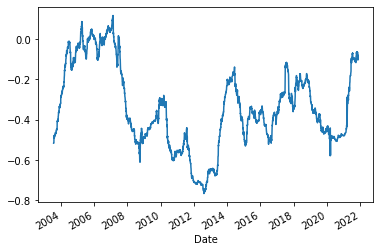

In [ ]:
tlthist['return'].rolling(252).corr(spyhist['return']).plot()

### Classic portfolio

The sharpe ratio of 60/40 portfolio is better than the buy and hold portfolio and volatility-scaled portfolio of SPY. Over the last 20 years, bond is a successful hedge for stocks.

In [ ]:
selected_etf = yf.Ticker("TLT")
tlthist = selected_etf.history(period="max")
selected_etf = yf.Ticker("SPY")
spyhist = selected_etf.history(period="max")
tlthist['return'] = tlthist['Close'].loc['2008-01-01':].pct_change()
spyhist['return'] = spyhist['Close'].loc['2008-01-01':].pct_change()

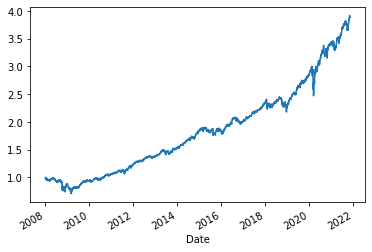

In [ ]:

# 60/40 portfolio
classic = 0.6 * spyhist['return'] + 0.4 * tlthist['return']
classic = classic.dropna()
portfolio_classic = (1 + classic).cumprod()
portfolio_classic.plot()

In [ ]:
classic.mean() / classic.std() * np.sqrt(252)

0.9324096354712884

### Optimal Amount of Bonds

We investigate the optimal amount of bonds to be included in the portfolio for hedging. We construct a portfolio, rebalanced daily with x% of bonds and (100-x)% of stocks. The optimal amount of bonds to hold in the portfolio from 2000 to 2021 is 56%, which is quite different from the textbook value of 40%. Moreover, this ratio is set post-hoc which introduces forward-looking bias.

A major drawback of using bond as a hedge is that it lower portfolio return unless leverage is used. A portfolio without leverage consisting of 44% stock and 56% bonds would have an average annual return of 9% per year.


In [ ]:
def bond_hedge(start_date='2008-01-01',end_date='2021-11-01'):
    Volatility = yf.download('TLT', start=start_date, end=end_date).dropna()
    Stock = yf.download('SPY', start=start_date, end=end_date).dropna()
    Stock['Return'] = Stock['Adj Close'].pct_change()
    Volatility['Return'] = Volatility['Adj Close'].pct_change()
    results = dict()
    average_returns = dict()
    for hedge_ratio in range(0,80,2):
        hedge_ratio = hedge_ratio/100
        Portfolio = (1-hedge_ratio) * Stock['Return'] + hedge_ratio * Volatility['Return']
        sharpe = Portfolio.mean() /  Portfolio.std() * np.sqrt(252)
        results[hedge_ratio] = sharpe
        average_returns[hedge_ratio] = Portfolio.mean() * 252
    return pd.Series(results), average_returns, max(results.values()) , max(results, key=results.get)



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


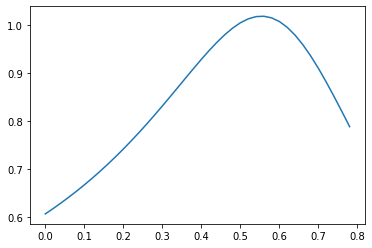

In [ ]:
bond_return, average_returns, sharpe, hedge_ratio = bond_hedge()
bond_return.plot()

In [ ]:
sharpe, hedge_ratio,  average_returns[hedge_ratio]

(1.0187013771770366, 0.56, 0.0952784225494056)

### Mean-Variance Optimisation


We will demonstrate a very basic example of Mean-variance optimisation using different ETFs

ETF selection
- SPY: US Stocks 500 (Core)
- QQQ: US Tech Stocks 100 (Growth)
- TLT: US 20Y+ Treasuries (Interest Rates)
- LQD: US Investment Grade Corp Bonds (Credit)
- GLD: Gold (Precious Metals)
- DBC: Invesco DB Commodity Index Tracking Fund (Commodities)

In [ ]:
prices = list()

ETF_list = ['SPY','QQQ','TLT','LQD','GLD','DBC']

for ETF in ETF_list :
    selected_etf = yf.Ticker(ETF)
    etfhist = selected_etf.history(period="max")
    prices.append(etfhist['Close'].loc['2005-01-01':])

In [ ]:
merged_prices = pd.DataFrame(pd.concat(prices,axis=1))
merged_prices.columns = ETF_list

In [ ]:
from pypfopt import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage

mu = mean_historical_return(merged_prices.loc['2008-01-01':])
S = CovarianceShrinkage(merged_prices).ledoit_wolf()

In [ ]:
from pypfopt.efficient_frontier import EfficientFrontier

ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()

In [ ]:
cleaned_weights = ef.clean_weights()
cleaned_weights

OrderedDict([('SPY', 0.0),
             ('QQQ', 0.45697),
             ('TLT', 0.44332),
             ('LQD', 0.05819),
             ('GLD', 0.04152),
             ('DBC', 0.0)])

In [ ]:
ef.portfolio_performance(verbose=True)

Expected annual return: 11.1%
Annual volatility: 9.8%
Sharpe Ratio: 0.93


(0.11100482341894331, 0.0980102858931459, 0.9285231911083274)

We can also change the optimisation criteria for Efficiet Frontier to penalise downside volatility only. For long-only portfolios, it is often better to use Sortino Ratio which penalise downside volatility only.

In [ ]:
from pypfopt import expected_returns, EfficientSemivariance

In [ ]:
mu = expected_returns.mean_historical_return(merged_prices.loc['2008-01-01':])
historical_returns = expected_returns.returns_from_prices(merged_prices.loc['2008-01-01':])

es = EfficientSemivariance(mu, historical_returns)
es.efficient_return(0.1)

OrderedDict([('SPY', 1.343372944e-07),
             ('QQQ', 0.3650425943528836),
             ('TLT', 0.3830806476916306),
             ('LQD', 0.1656048353715538),
             ('GLD', 0.086271497066019),
             ('DBC', 2.909341898e-07)])

In [ ]:
weights = es.clean_weights()
print(weights)
es.portfolio_performance(verbose=True)

OrderedDict([('SPY', 0.0), ('QQQ', 0.36504), ('TLT', 0.38308), ('LQD', 0.1656), ('GLD', 0.08627), ('DBC', 0.0)])
Expected annual return: 10.0%
Annual semi-deviation: 6.2%
Sortino Ratio: 1.28


(0.1000000681558701, 0.062425633432387446, 1.2815259334535603)

In [ ]:
target_portfolio = list()

for target_return in [0.05,0.1,0.15]:
    es = EfficientSemivariance(mu, historical_returns)
    es.efficient_return(target_return)
    weights = es.clean_weights()
    weights['Sortino'] = es.portfolio_performance()[-1]
    weights['Target'] = target_return
    target_portfolio.append(weights)

In [ ]:
pd.DataFrame(target_portfolio)

,SPY,QQQ,TLT,LQD,GLD,DBC,Sortino,Target
0,0.10788,0.04005,0.21928,0.46372,0.10058,0.06849,0.785791,0.05
1,0.00000,0.36504,0.38308,0.16560,0.08627,0.00000,1.281526,0.10
2,0.00000,0.81466,0.18534,0.00000,0.00000,0.00000,1.082178,0.15



### Volatility Scaling and Kelly Criterion

We will demonstrate a very simple but effective way to construct portfolio which can be applied to individual assets and strategies.

We decide a lookback period (252 days) to calculate the rolling volatility of each asset. For a given risk level (10% p.a.), we scale the position we will take for each asset so that we will have equal risk in each asset, before taking into account of correlation between strategies.

We then take the simple average over these strategies to form our portfolio.

We can then calculate the overall volatility of the portfolio, which will be lower than the given risk level due to negative correlation between strategies. We can then leverage the whole portfolio to the target risk level.

While this method is different from risk parity, as it does not explicitly consider the correlation between assets. The two-step optimisation process is more robust than risk parity when correlation structure between stratgies/assets changes.

Consider a portfolio consisting of a risky asset and a riskfree asset, Kelly Criterion can be used to determine the optimal amount of investment in the risky asset to maximise the expectation of the logarithm of wealth.

Given an asset with return $\mu$ and volatility $\sigma$, riskfree rate $r$, the optimal fraction to invest in the asset is given by $\frac{\mu-r}{\sigma^2}$

Volatility scaling can be considered as a primitive way of applying kelly Criterion.



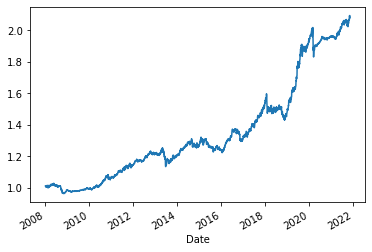

In [ ]:
merged_returns = merged_prices.pct_change().dropna()
merged_std = merged_returns.rolling(252).std() * np.sqrt(252)
merged_pos = 0.1 * 0.1 / (merged_std * merged_std)
merged_portfolio = merged_pos * merged_returns
portfolio = (1 + np.mean(merged_portfolio.loc['2008-01-01':,],axis=1)).cumprod()
portfolio.plot()

In [ ]:
average_return = np.mean(merged_portfolio.loc['2008-01-01':,],axis=1)
average_return.mean() / average_return.std() * np.sqrt(252)

1.0367923048956884

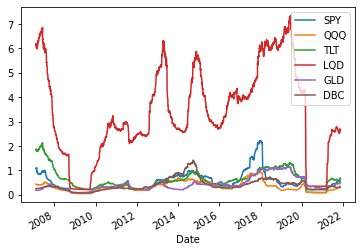

In [ ]:
merged_pos.dropna().plot()

The sharpe ratio we obtained is better than the one we obtained by Mean-Variance optimisation and other optimisation methods. Our method is also more robust as it is based on simple rules. Some portfolio optimisation methods might fail to converge due to solving a non-convex problem.

It is also better than the traditional 60/40 portfolio.

Taking a simple average of vol-scaled strategies can outperform more sophiscated portfolio optimisation methods unless one has a good understanding on the correlation structure of the strategies.

As above, we assume we can take leverage without incurring additional costs. For our example, we assume we can leverage on US Investment Crop Bonds (LQD) up to 5x, which is unlikely for retail to achieve.







###  Alternatives to Sharpe Ratio

We discuss alternative measures to portfolio performance other than Sharpe/Sortino Ratio.

We have introduced Modern Portfolio Theory (Mean-Variance Optimisation) as a portfolio allocation tool. This model has significant drawbacks due to
- Impossibility to forecast future returns from historical returns
- Correlation between assets changes overtime

For long volatility strategies, sharpe ratio would be a misleading performance indicator as it ignores the following

- Skewness and Kurtosis
- Max Drawdown

Cole wins above replacement ratio (CWARP) aims to measure the diversification benefits of an alternative asset/strategy that to a traditional stock/bond portfolio.

Define $S_n, S_p$ be the sharpe ratio of the new and original portfolio. RMDD be the Return to Max-Drawdown Ratio, CWARP $\chi$ is defined as follows

$\chi = \sqrt{\frac{S_n}{S_p}\frac{\text{RMDD}_n}{\text{RMDD}_p}} - 1 $

CWARP provides an alternative to risk parity(volatility scaling) for portfolio optimisation. Rather than identifying different assets and strategies that have a positive return in the long run and get a balanced exposure to those, one can focus on identifying strategies that are uncorrealted/negatively correlated to the market and check if they can improve the CWARP. These strategies are often called long volatility/tail risk strategies which can be both systematic and discrentionary.





In [ ]:
## Input is pandas series of pct return of a strategy
def strategy_metrics(strategy, interval=1):
    results = dict()
    results['sharpe'] = strategy.mean() / strategy.std() * np.sqrt(252/interval)
    results['mean'] = strategy.mean() * 252 / interval
    results['volatility'] = strategy.std() * np.sqrt(252/interval)
    results['skew'] = strategy.skew()
    results['kurtosis'] = strategy.kurtosis()
    portfolio = (1+strategy).cumprod()
    dd = (portfolio - portfolio.cummax()) / portfolio.cummax()
    results['max_drawdown'] = -1 * dd.cummin().min()
    results['RMDD'] = results['mean'] / results['max_drawdown']
    return results

def CWARP(strategy1, strategy2, interval=1):
    performance1 = strategy_metrics(strategy1,interval)
    performance2 = strategy_metrics(strategy2,interval)
    CWARP_ratio = (np.sqrt(performance2['sharpe']*performance2['RMDD']) / np.sqrt(performance1['sharpe']*performance1['RMDD'])) - 1
    return CWARP_ratio

### Random Portfolios as new way to benchmark

There was a famous experiment of constructing portfolio from randomly selecing stocks within the largest 500 stocks in the US market and it can outperform SP 500 most of the time. Different results will be obtained depends on the number of stocks selected (>50 will give a robust simulation), weighting (equal/volatility scaled), rebalancing frequency (monthly/quarterly/yearly). It is important to note that we regularly rebalance and only select stocks within the SP 500 universe. This will remove companies that are delisted from our stock selection universe.

This suggests a different method to measure the performance of (long-only) active-managed funds. We compare the performance of the fund with simulated portfolios consisting of randomly selected stocks. The ranking of the fund within these simulated portfolio will determine the information gained from stock picking.


### Recent methods in portfolio optimisation

The ETF we considered above are the building blocks of the global financial market. We have not included crypto due to its lack of history.


Since the financial crisis, due to high fees and under-performance compared to the market, pensions funds are limiting their allocation to hedge funds, in particular trend-following (CTA) and long-short equity funds.


Many market-neutral equity funds to employ machine learning methods to build strategies and models. The data required to build a market-neutral and factor neutral fund is often not accessible to retail investors. Numerai allows retail traders to build their own market-neutral equity strategies with all the data and infrastructure provided.


While the strategies themselves can be based on both momentum and mean-reversion, machine learning models works well when correlation is stationary. When there are shocks in the market, machine learning models in general will perform poorly. We suggest during market stress, trend following and other long volatility strategies would act as a good diversifier for machine learning based strategies.


We provide an example of a balanced portfolio by Christopher Cole (Artemis Capital Management) and Mutiny Funds.


Dragon Portfolio by Christopher Cole

- 24% Equity
- 18% Fixed income
- 19% Gold
- 18% Commodities Trend Following
- 21% Active Long Volatility


As the dargon portfolio is NOT easy for retail to implement, I recommend the following instead

- 50% Equity Index Fund
- 15% Commodities Trend Following
- 15% Machine-Learning based Market Neutral Fund (Numerai)
- 20% Defensive Assets (Cash/Government Bonds/Gold)

OR

- 60% Equity Index Fund
- 20% Commodities Trend Following
- 20% Defensive Assets (Cash/Government Bonds/Gold)




### Recommended Readings

- Cole Wins Above Replacement Portfolio (CWARP™)https://www.artemiscm.com/cwarp
- The Allegory of the Hawk and Serpent https://artemiscm.docsend.com/view/taygkbn
- The Cockroach Fund https://mutinyfund.com/cockroach/  
- Numerai https://numer.ai/


## Lecture 7 Factor Model

We introduce the Capital Asset Pricing Model (CAPM) and a very simple factor model for US equities.

CAPM model performs a simple linear regression of stock return on market return. Fama–French three-factor model extends CAPM by considering the excess return of small caps over big caps (Size), High PB ratio Minus Low PB ratio (Value vs growth).

There are many improvements to the Fama-French factor models and there is no consensus on whether adding these factors are beneficial. It is easy to overfit and many discovery of risk premium/factors are not reproducible in a different period or geography.  

On the other hand, smart-beta factors such as momentum, value, quality, low volatility, high dividend are known to offer an excess return to the market historically (before 2010), though this excess return has diminished since these strategies become more popular. Recently many ETF providers offer smart-beta ETFs at a fee higher than standard market index ETFs. It is not known whether these ETFs will generate enough excess return to justify their higher fees.

There is over-crowding in smart-beta factors and it is now a standard for quant hedge funds to offer portfolios that are both market-neutral (dollar neutral and low beta) and factor-neutral (low correlation to known smart-beta factors).

The mathematical assumption we made here for factor models is that stock market returns is a high dimensional factor (>2000) which can be approximated by a lower dimensional space of smart-beta factors. Applying Principal Component Analysis (PCA) on the price data directly does not give a meaningful result. The first component would represent market risk (beta) but the other components have weak contribution. Therefore, recreating smart beta factors from price data in an unsupervised manner is diffcult and often desriable due to the lack of intrepretability of PCA components. In the industry, we often build factor models in a hierarchical manner where we first decompose the stock/strategy return into market/sector returns and further decompose the residue return into various style returns. The choice of style factors to be considered differs and often it is where unique insights can help.

The definition of smart-beta factors evolves with the perception of market particpants. Many smart-beta factors were once considered as alpha when there were first proposed. Factors such as value also underwent a period of under-performance since 2010 until recently (2021). A major area of quanitative research is creating factor portfolios with alternative datasets.













### Sector based model for equities

Building smart-beta factors requires building a survival-biased free database of stocks and computing cross-sectional stock ranking which can takes a lot of time. WRDS data services maintain a database for Fama-French 5 factors for US Equities which allow researchers to use directly. While it is possible to use smart-beta ETFs to approximate those factors. The limited history and not-so-transparent process of portfolio construction makes them not suitable for running backtest in the long run. There is a connection between smart-beta factors and industry momentum (Arnott 2020).

We suggest to use sector/indsutry excess returns as a replacement of factor returns. It can be shown the both set of factors are equivalent under a linear transformation.

Here we present a factor model based on different stock sectors. We first calculate the market return (SPY) and the excess sector return (various sector EFF - SPY), and then perform a non-negative linear regression.  These calculations are often based on rolling 12-month returns. At the start of each month, we use the data of the most recent 12-months to perform the regression. The residue (alpha) and regression coefficients (beta) changes over time as we see in the plots.

We comment that most factor models uses simple linear regression which would give a better fit but at the expense of the lack of interpretability. Non-negative linear regression performs regularisation as it tends to set very small sector exposure to zero.

We use the sector ETFs provided by SPDR except XLC (Communication Services) and XLRE (Real Estates) due to their lack of history.





In [ ]:
import pandas as pd
import yfinance as yf
import numpy as np
from sklearn.linear_model import LinearRegression

In [ ]:
def sector_factors(target='AAPL',start_date='1999-01-01',end_date='2021-12-31',positive=True):
    sectors = yf.download("XLB XLE XLF XLI XLK XLP XLV XLY XLU", start=start_date, end=end_date)
    market = yf.download("SPY", start=start_date, end=end_date)
    stock = yf.download(target, start=start_date, end=end_date)
    stock_return = stock['Adj Close'].pct_change().dropna()
    market_return = market['Adj Close'].pct_change().dropna().values.reshape(-1,1)
    sector_return = sectors['Adj Close'].pct_change().dropna() - market_return
    sector_cumulative_return = (1+sector_return).cumprod()
    return sector_cumulative_return

In [ ]:
sectors = sector_factors()

[*********************100%***********************]  9 of 9 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


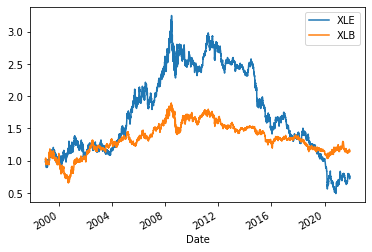

In [ ]:
## The Energy Sector in decline since 2008
sectors[['XLE','XLB']].plot()

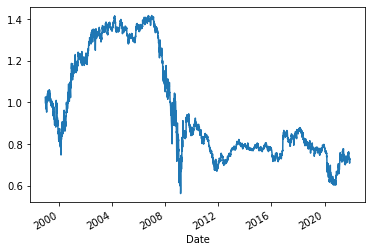

In [ ]:
## The Financial Sector never recover since 2008
sectors['XLF'].plot()

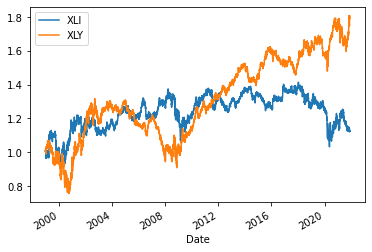

In [ ]:
## online retail growth since 2008
sectors[['XLI','XLY']].plot()

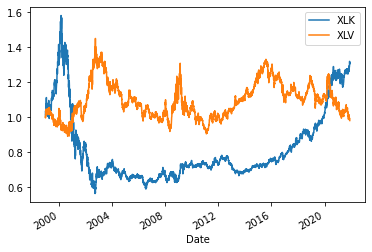

In [ ]:
## Tech Bubble 2.0?
sectors[['XLK','XLV']].plot()

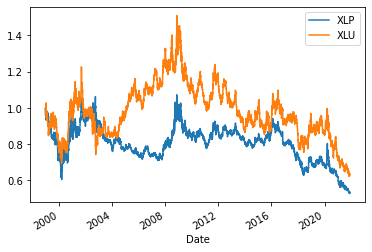

In [ ]:
## Old industries under-performing
sectors[['XLP','XLU']].plot()

In [ ]:
def sector_model(target='AAPL',start_date='2020-01-01',end_date='2020-12-31',positive=True):
    sectors = yf.download("XLB XLE XLF XLI XLK XLP XLV XLY XLU", start=start_date, end=end_date)
    market = yf.download("SPY", start=start_date, end=end_date)
    stock = yf.download(target, start=start_date, end=end_date)
    stock_return = stock['Adj Close'].pct_change().dropna()
    market_return = market['Adj Close'].pct_change().dropna().values.reshape(-1,1)
    sector_return = sectors['Adj Close'].pct_change().dropna() - market_return
    factor_return = np.concatenate((market_return,sector_return), axis=1)
    reg = LinearRegression(positive=positive).fit(factor_return, stock_return)
    result = dict(zip(['SPY', 'XLB', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLU', 'XLV', 'XLY'],reg.coef_))
    result['alpha'] = reg.intercept_ * 252
    ## Hedge stock with factors
    reg2 = LinearRegression(positive=positive, fit_intercept=False).fit(factor_return, stock_return)
    result['r2'] = reg2.score(factor_return, stock_return)
    fitted_return = (1+reg2.predict(factor_return)).cumprod().reshape(-1,1)
    original_return = (1+stock_return).cumprod().values.reshape(-1,1)
    df = pd.DataFrame(np.concatenate((fitted_return,original_return),axis=1),columns=['fitted','stock'],index=stock_return.index)
    return result, df

We will analyse the stock return of Apple Inc. (AAPL), Amazon.com, Inc (AMZN), Tesla Inc. (TSLA), all of them being big cap growth stocks in the US.

As expected, all of them have a high exposure towards the tech sector factor (XLK - SPY) and the market factor (SPY).

Both AMZN and TSLA are in the Consumer Discrentionary sector but regression result suggest they should be considered in being both the Technology Sector and Consumer Discrentionary sector.

Naive portfolio risk would report sector exposure using the GICS classification and sum over the holdings. As new technology and business emerge, traditional sector classification will NOT be able to updated quick enough to accurately measuring the factor risk of a stock and a portfolio. We suggest a better alternative is to rely on the regression coefficients obtained with our model.

The Factor Model can also be used to screen outlier stocks such as GameStop Corp (GME) during the meme stock short squeeze. Our model failed to explain the price movement as it failed to account for the effect of short squeeze or social media (Reddit).

We also report the coefficient of determination on the fitted models. For big cap stocks such as AAPL, AMZN we have $R^2$ bigger than 0.5, suggesting a reasonable fit. For GME, we have a very small $R^2$, confirming the stock is an outlier that its price movement cannot be explained by traditional factors. $R^2$ depends on the fitted period also. A better $R^2$ can be obtained by fitting a shorter period but that implies the model needs to updated more frequently.

Standard measures of market-beta would be calculated based on the rolling correlation of 252 days return. We recommend the lookback period to be set at least 3 months in order to get a robust model.





In [ ]:
result, fitted_return = sector_model('AAPL','2020-01-01','2021-12-31')

[*********************100%***********************]  9 of 9 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
result

{'SPY': 0.9604157247250555,
 'XLB': 0.0,
 'XLE': 0.0,
 'XLF': 0.0,
 'XLI': 0.019659742236589197,
 'XLK': 1.524636828124519,
 'XLP': 0.09351468274289074,
 'XLU': 0.02381212141600018,
 'XLV': 0.0,
 'XLY': 0.0,
 'alpha': 0.06135833478074021,
 'r2': 0.8202890242311578}

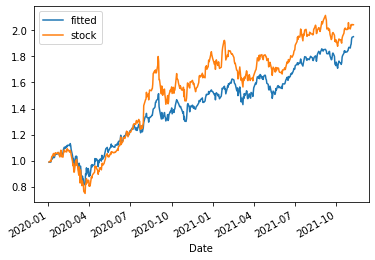

In [ ]:
fitted_return.plot()

In [ ]:
result, fitted_return = sector_model('AMZN','2021-01-01','2021-12-31')

[*********************100%***********************]  9 of 9 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
result

{'SPY': 0.7116065926614837,
 'XLB': 0.0,
 'XLE': 0.0,
 'XLF': 0.0,
 'XLI': 0.0,
 'XLK': 0.9066791147448191,
 'XLP': 0.0,
 'XLU': 0.05077110987762271,
 'XLV': 0.0,
 'XLY': 0.6900957416501956,
 'alpha': -0.1147318059024013,
 'r2': 0.48618458061295766}

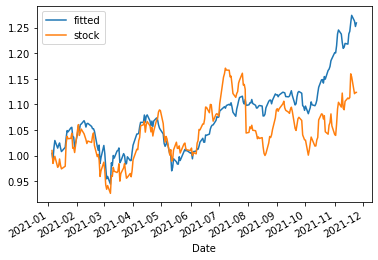

In [ ]:
fitted_return.plot()

In [ ]:
result, fitted_return = sector_model('TSLA','2020-01-01','2020-07-31')

[*********************100%***********************]  9 of 9 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
result

{'SPY': 0.9294697924428448,
 'XLB': 0.5238949979651533,
 'XLE': 0.2700145693980022,
 'XLF': 0.0,
 'XLI': 0.0,
 'XLK': 1.6798025588375518,
 'XLP': 0.0,
 'XLU': 0.0,
 'XLV': 0.0,
 'XLY': 3.0034151300248184,
 'alpha': 1.865527851643236,
 'r2': 0.4146327128749161}

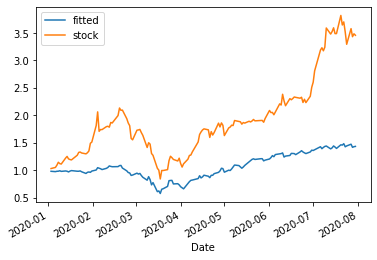

In [ ]:
fitted_return.plot()

In [ ]:
result, fitted_return = sector_model('GME','2021-05-01','2021-08-31')

[*********************100%***********************]  9 of 9 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
result

{'SPY': 0.0,
 'XLB': 0.517559418077943,
 'XLE': 0.1892246822703397,
 'XLF': 1.2160610634991091,
 'XLI': 0.8910882742031301,
 'XLK': 2.497484516849314,
 'XLP': 0.04126734259986952,
 'XLU': 0.0,
 'XLV': 0.0,
 'XLY': 3.4888274407654407,
 'alpha': 1.859422673717394,
 'r2': 0.08667781263159335}

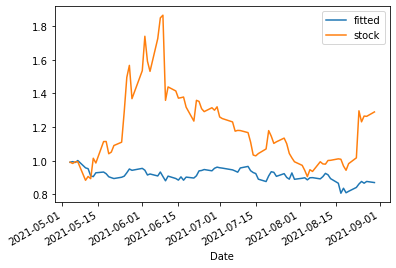

In [ ]:
fitted_return.plot()

In [ ]:
result, fitted_return = sector_model('GS','2010-01-01','2030-07-31')

[*********************100%***********************]  9 of 9 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
result

{'SPY': 0.9690312599728266,
 'XLB': 0.03590933518445654,
 'XLE': 0.028858301484713474,
 'XLF': 1.2805472417219323,
 'XLI': 0.0,
 'XLK': 0.3287858794114723,
 'XLP': 0.0,
 'XLU': 0.0,
 'XLV': 0.0,
 'XLY': 0.005645538606987807,
 'alpha': -0.02476491734788178,
 'r2': 0.7322177343817364}

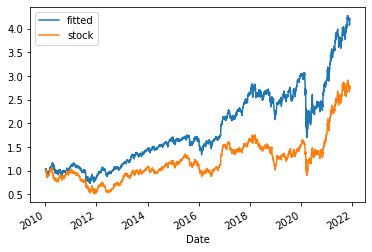

In [ ]:
fitted_return.plot()

We apply the above model to perform walk forward predictions. At the start of each month, we train a regression model and use the regression weights to create a portfolio of market and sector ETFs to hold for the next month. We then compute the sharpe ratio of the original asset, the reconstruction and the difference between the original asset and reconstruction.

In [ ]:
def sector_model_nonnegative(stock,market,sectors,start_date='2016-01-01',end_date='2020-12-31'):
    field_name = 'Adj Close'
    stock_return = stock[field_name].loc[start_date:end_date,].pct_change().dropna()
    market_return = market[field_name].loc[start_date:end_date,].pct_change().dropna().values.reshape(-1,1)
    sector_return = sectors[field_name].loc[start_date:end_date,].pct_change().dropna()
    factor_return = np.concatenate((market_return,sector_return), axis=1)
    reg = LinearRegression(positive=True,fit_intercept=False).fit(factor_return, stock_return)
    result = dict(zip(['SPY', 'XLB', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLU', 'XLV', 'XLY'],reg.coef_))
    result['r2'] = reg.score(factor_return, stock_return)
    return result, reg

def sector_model_prediction(reg,stock,market,sectors,start_date='2016-01-01',end_date='2020-12-31'):
    field_name = 'Adj Close'
    stock_return = stock[field_name].loc[start_date:end_date,].pct_change().dropna()
    market_return = market[field_name].loc[start_date:end_date,].pct_change().dropna().values.reshape(-1,1)
    sector_return = sectors[field_name].loc[start_date:end_date,].pct_change().dropna()
    factor_return = np.concatenate((market_return,sector_return), axis=1)
    prediction = reg.predict(factor_return)
    return pd.Series(prediction,index=stock_return.index), stock_return

def sector_factors_model(target='ED',start_date='2016-01-01',end_date='2020-12-31'):
    sectors = yf.download("XLB XLE XLF XLI XLK XLP XLV XLY XLU", start=start_date, end=end_date)
    market = yf.download("SPY", start=start_date, end=end_date)
    stock = yf.download(target, start=start_date, end=end_date)
    d = pd.date_range(start=start_date, end=end_date, freq='MS')
    results = list()
    predict_returns = list()
    actual_returns = list()
    for i in range(0,d.shape[0]-13):
        result, fitted_model = sector_model_nonnegative(stock,market,sectors,d[i],d[i+12])
        result['date'] = d[i+12]
        results.append(result)
        # Walk Forward Predictions
        predict_return, actual_return = sector_model_prediction(fitted_model,stock,market,sectors,d[i+12],d[i+13])
        predict_returns.append(predict_return)
        actual_returns.append(actual_return)
    return pd.DataFrame(results), pd.concat(predict_returns) , pd.concat(actual_returns)

In [ ]:
def sharpe_ratios(prediction,actual):
    diff = actual - prediction
    results = dict()
    results['prediction'] = prediction.mean() / prediction.std() * np.sqrt(252)
    results['actual'] = actual.mean() / actual.std() * np.sqrt(252)
    results['diff'] = diff.mean() / diff.std() * np.sqrt(252)
    return results

In [ ]:
def skewness(prediction,actual):
    diff = actual - prediction
    results = dict()
    results['prediction'] = prediction.skew()
    results['actual'] = actual.skew()
    results['diff'] = diff.skew()
    return results

In [ ]:
sample, prediction, actual = sector_factors_model('QQQ',start_date='2008-01-01',end_date='2021-08-31')

[*********************100%***********************]  9 of 9 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


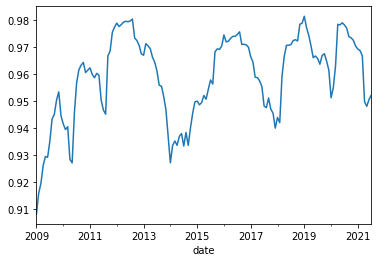

In [ ]:
sample.set_index('date')['r2'].plot()

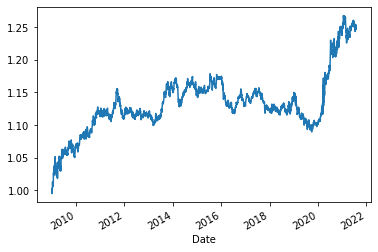

In [ ]:
diff = actual - prediction
(1+diff).cumprod().plot()

In [ ]:
sharpe_ratios(prediction,actual)

{'actual': 1.094030801965354,
 'diff': 0.45907365501477354,
 'prediction': 1.012646022565877}

In [ ]:
skewness(prediction,actual)

{'actual': -0.38888548323017597,
 'diff': -0.12639976386780505,
 'prediction': -0.4264551649800713}

In [ ]:
sample, prediction, actual = sector_factors_model('MRNA',start_date='2019-01-01',end_date='2021-12-31')

[*********************100%***********************]  9 of 9 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


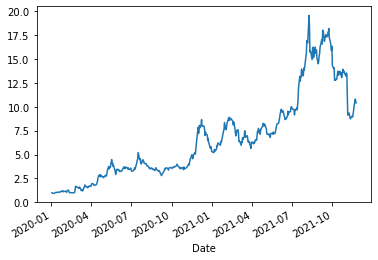

In [ ]:
diff = actual - prediction
(1+diff).cumprod().plot()

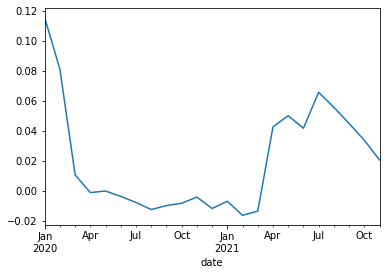

In [ ]:
sample.set_index('date')['r2'].plot()

### Recent research of stock return factors

We provide a few examples from academic research that identify factors that can affect stock return

- Patent, Research and Developement https://papers.ssrn.com/sol3/papers.cfm?abstract_id=1799675
- News Sentiment https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3389884
- Hedge Fund Positions (13F filings) https://papers.ssrn.com/sol3/papers.cfm?abstract_id=1683628
- Reddit https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3807655
- Retail Order Flow https://papers.ssrn.com/sol3/papers.cfm?abstract_id=2822105
- Insider Transactions https://papers.ssrn.com/sol3/papers.cfm?abstract_id=2781761
- Political Connections https://papers.ssrn.com/sol3/papers.cfm?abstract_id=2836053
- Implied roughness https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3301669


Ernie Chan has a book on many intraday and interday momentum/mean-reversion based strategies. The book is written in 2013. It would be interesting to check if these ideas still work.

### Professional Example of Factor Model

We introduce a factor model provided by TwoSigma which can be applied on any global macro portfolio.
https://www.venn.twosigma.com/

It is a hierarchical model which decompose portfolio into core and secondart macro factors, along with style factors for equities and marco.

- Core Macro
  - Equity (Long-term economic growth and profitability of companies)
  - Interest Rates (Time value of money (interest rates and inflation risk))
  - Credit (Corporate default and failure-to-pay risks specific to developed market corporate bonds)
  - Commodities (Changes in prices for hard assets)

- Secondary Macro
  - Emerging Markets (Sovereign and economic risks of emerging markets relative to developed markets)
  - Foreign Currency (Moves in foreign currency values versus the portfolio’s local currency)
  - Local Inflation (Inflation-linked rates relative to fixed nominal rates within the local currency area)
  - Local Equity (Tendency to invest in domestic over foreign equity)

- Macro Styles
  - Equity Short Volatility (Negative exposure to the moves in equity market volatility)
  - Fixed Income Carry (High-yielding 10-year bond futures funded by low-yielding 10-year bond futures)
  - Foreign Exchange Carry (High-yielding G10 currencies funded by low-yielding G10 currencies)
  - Trend Following (Long-short exposure to multi-asset-class futures based on 6- to 12-month trailing returns)

- Equity Styles
  - Low Risk/Volatility (Low betas to the global equity market and low residual return volatility)
  - Momentum (Stocks that have outperformed over the past year)
  - Quality (High earnings quality, investment quality, profitability, low earnings variability and leverage)
  - Value (Underperforming stocks that have low PB ratios and high earnings and dividend yields)
  - Size (Difference between small and large cap)
  - Crowding (Short exposure to stocks with a wide investment community holding of short positions)





### A simplified version of global marco portfolio

We offer a US-Centric global marco factor model using various ETFs. For longer history (before 2010), we often need to create these factors from various benchmark indices or underlying Futures which the data is available through Bloomberg or other data vendors.

We would analyse return based on the following factors. This model is NOT optimised and only for illustrative purposes.

- SPY (US Equity Core)
- TLT (Interest Rates)
- DBC (Commodities)
- UUP (Dollar Index)


In [ ]:
def macro_model_nonnegative(stock,market,sectors,start_date='2016-01-01',end_date='2020-12-31',excess_return=False):
    field_name = 'Adj Close'
    stock_return = stock[field_name].loc[start_date:end_date,].pct_change().dropna().values.reshape(-1,1)
    market_return = market[field_name].loc[start_date:end_date,].pct_change().dropna().values.reshape(-1,1)
    sector_return = sectors[field_name].loc[start_date:end_date,].pct_change().dropna()
    factor_return = np.concatenate((market_return,sector_return), axis=1)
    if excess_return:
        stock_return = stock_return - market_return
    reg = LinearRegression(positive=True,fit_intercept=False).fit(factor_return, stock_return)
    result = dict(zip(['SPY','DBC','TLT','UUP'],reg.coef_.reshape(-1)))
    return result, reg

def macro_model_prediction(reg,stock,market,sectors,start_date='2016-01-01',end_date='2020-12-31',excess_return=False):
    field_name = 'Adj Close'
    stock_return = stock[field_name].loc[start_date:end_date,].pct_change().dropna().values.reshape(-1,1)
    market_return = market[field_name].loc[start_date:end_date,].pct_change().dropna().values.reshape(-1,1)
    sector_return = sectors[field_name].loc[start_date:end_date,].pct_change().dropna()
    factor_return = np.concatenate((market_return,sector_return), axis=1)
    if excess_return:
        stock_return = stock_return - market_return
    prediction = reg.predict(factor_return)
    stock_index = stock[field_name].loc[start_date:end_date,].pct_change().dropna().index
    return pd.Series(prediction.reshape(-1),index=stock_index), pd.Series(stock_return.reshape(-1),index=stock_index)

def macro_factors_model(target='ED',start_date='2016-01-01',end_date='2020-12-31', excess_return=False):
    sectors = yf.download("DBC TLT UUP", start=start_date, end=end_date)
    market = yf.download("SPY", start=start_date, end=end_date)
    stock = yf.download(target, start=start_date, end=end_date)
    ## Rebalance Dates
    d = pd.date_range(start=start_date, end=end_date, freq='MS')
    results = list()
    predict_returns = list()
    actual_returns = list()
    for i in range(0,d.shape[0]-13):
        result, fitted_model = macro_model_nonnegative(stock,market,sectors,d[i],d[i+12],excess_return=excess_return)
        result['date'] = d[i+12]
        results.append(result)
        # Walk Forward Predictions
        predict_return, actual_return = macro_model_prediction(fitted_model,stock,market,sectors,d[i+12],d[i+13],excess_return=excess_return)
        predict_returns.append(predict_return)
        actual_returns.append(actual_return)
    return pd.DataFrame(results), pd.concat(predict_returns) , pd.concat(actual_returns)

We use our global marco model to analyse some of the retail Managed Futures ETFs to check if they can offer diversification effects

- WisdomTree Managed Futures Strategy Fund (WTMF:US)
- ProShares Managed Futures Strategy ETF (FUT:US)
- First Trust Managed Futures Strategy Fund (FMF:US)
- iM DBi Managed Futures Strategy ETF (DMBF:US)

The ETFs has a low correlation to market and most has a sharpe ratio greater than 1 during 2021.

A particular problem of these ETFs is the lack of transparency on the strategy implementation as these ETFs has sharpe ratio ranged from 0.6 to 1.6.

Given a high cost of these ETFs, these ETFs are only suitable for small portfolio where it is difficult to achieve the diversifiation required by trend-following strategies.

In [ ]:
## WisdomTree Managed Futures Strategy Fund (WTMF:US)
sample, prediction, actual = macro_factors_model('WTMF',start_date='2019-06-01',end_date='2021-08-31',excess_return=False)

[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


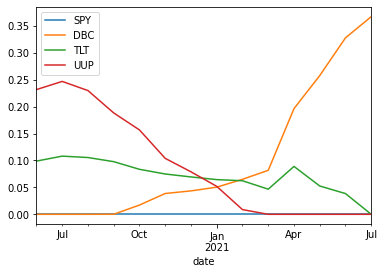

In [ ]:
sample.set_index('date').plot()

In [ ]:
sharpe_ratios(prediction,actual)

{'actual': 1.6560507581496737,
 'diff': 1.5726157132635574,
 'prediction': 0.7383315908486264}

In [ ]:
## ProShares Managed Futures Strategy ETF (FUT:US)
sample, prediction, actual = macro_factors_model('FUT',start_date='2019-06-01',end_date='2021-08-31',excess_return=False)

[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
sharpe_ratios(prediction,actual)

{'actual': 0.6105026606349527,
 'diff': 0.6315595195903931,
 'prediction': -0.13859592581708355}

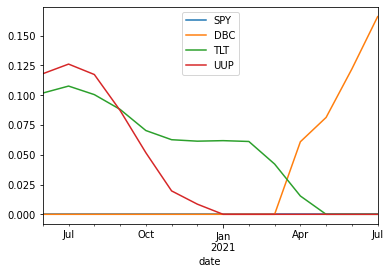

In [ ]:
sample.set_index('date').plot()

In [ ]:
sample, prediction, actual = macro_factors_model('FMF',start_date='2019-06-01',end_date='2021-08-31',excess_return=False)

[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
sharpe_ratios(prediction,actual)

{'actual': 0.7337557095658895,
 'diff': 0.20419164213665406,
 'prediction': 1.849858909026171}

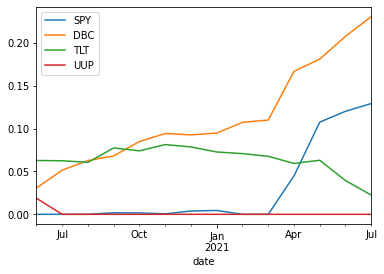

In [ ]:
sample.set_index('date').plot()

In [ ]:
sample, prediction, actual = macro_factors_model('DBMF',start_date='2019-06-01',end_date='2021-08-31',excess_return=False)

[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
sharpe_ratios(prediction,actual)

{'actual': 1.0152802060671653,
 'diff': 0.622183621066653,
 'prediction': 1.0951090529900764}

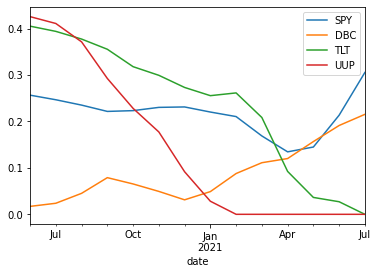

In [ ]:
sample.set_index('date').plot()

### Use Cases for Factor Model

- Analyse new strategies developed by ML methods and to see whether they are orthogonal to known factors.
- Create hedges for existing holdings. Example from gs quant https://nbviewer.org/github/goldmansachs/gs-quant/blob/master/gs_quant/content/made_with_gs_quant/9-Hedging%20using%20Machine%20Learning%20Techniques.ipynb
- ETF market making. While there number and AUM of ETFs is growing, we suggest most failed to provide return factors that are orthogonal to market and sector factors. The above result would suggest it is profitable for market-makers to quote these new and low volume ETFs with a higher spread and hedge with the more liquid instruments. ETF market-making is a very profitable business. Most of these market-makers are not listed, where Flow Traders (FLOW:NL) and Virtu Financial (VIRT:US) are the exception.
- Create synthetic assets for trading, we can trade the difference between replication and the original by mean-reversion/momentum to obtain market-neutral returns



### Long/Short Equity and implied correlation

Any directional systematic trading strategy that involves stoploss and takeprofit can be considered as a combination of option trades, which can be classified as either long/short volatility.

A Long Short Equity portfolio with market and sector risk neutralise can be considered as a delta-replication of an implied correlation portfolio (Trade the correlation between Market/Sector/Smart-beta factors and individual companies within the market).

Dispersion is an option trading strategy that aims to take profit from (lack of) changes in correlation between assets. A long dispersion trade involves selling an ATM straddle on the SPX and buying ATM straddles on the component stocks. The trade is betting on decreasing correlation, as a reduction will lead to a larger decrease in the SPX option implied volatility relative to that of the basket option portfolio.







### Recommend Readings

- Factor Momentum https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3116974 (Arnott 2020)
- Two Sigma Venn https://www.twosigma.com/wp-content/uploads/Forecasting-Factor-Returns.FINAL_-1.pdf
- Algorithmic Trading: Winning Strategies and Their Rationale (Ernie Chan 2013)
- A Machine Learning Approach to Regime Modeling https://www.twosigma.com/articles/a-machine-learning-approach-to-regime-modeling/


## Lecture 8 Tree-based methods  

- Joint Distribution (Signal1, Signal2, target) with quantile/z-score transform in the form of a table

- Decision trees / xgboost when more than two features

- Redundant information in technical indicators

- Signal to Noise Ratio: consider example where all features are noise, but features can still be significant from linear regression/decision tree

- Recent methods for tabular data (TabNet)

- Example of quant challenges (Numerai)




### Joint Factor Analysis

It is often better to combine various technical indicators to achieve greater prediction power.

We provide here a very simple way to analyse the joint effects of two indicators. We first split the data into training and test period. We standarise the features and clip the z-scores between -2 and 2, we then analyse the forward return condition on the possible combinations of z-scores.

We can compare the results during the training and test period to see how well this model predicts.

In [ ]:
from sklearn.preprocessing import QuantileTransformer, MinMaxScaler, StandardScaler

def joint_factor(pricedf,factor1,factor2,target,method='count',group=5):
    df = pricedf.copy()
    df['rank1'] = np.floor(df[factor1].rank(pct=True)*group-10e-5)
    df['rank2'] = np.floor(df[factor2].rank(pct=True)*group-10e-5)
    if method == 'count':
        result = df.groupby(['rank1','rank2']).count()[target]
    else:
        result = df.groupby(['rank1','rank2']).mean()[target] / df.groupby(['rank1','rank2']).std()[target] * np.sqrt(252)
    return result.reset_index().pivot('rank1','rank2',target).rename_axis(index=factor1,columns=factor2)


def joint_factor_train(pricedf,factor1,factor2,target,method='count',n_quantiles=5,interval=5):
    df_train = pricedf.copy().loc['2010-01-01':'2015-01-01']
    df_test = pricedf.copy().loc['2015-01-01':'2030-01-01'].dropna()
    #scaler = QuantileTransformer(n_quantiles=n_quantiles, random_state=0)
    #scaler = MinMaxScaler()
    scaler = StandardScaler()
    df_train[['rank1','rank2']] = np.round(np.clip(scaler.fit_transform(df_train[[factor1,factor2]]),-2,2))
    df_test[['rank1','rank2']] = np.round(np.clip(scaler.transform(df_test[[factor1,factor2]]),-2,2))
    if method == 'count':
        train_result = df_train.groupby(['rank1','rank2']).count()[target]
        test_result = df_test.groupby(['rank1','rank2']).count()[target]
    elif method == 'sharpe':
        train_result = df_train.groupby(['rank1','rank2']).mean()[target] / df_train.groupby(['rank1','rank2']).std()[target] * np.sqrt(252)
        test_result = df_test.groupby(['rank1','rank2']).mean()[target] / df_test.groupby(['rank1','rank2']).std()[target] * np.sqrt(252)
    else:
        train_result = df_train.groupby(['rank1','rank2']).mean()[target] * 252 / interval
        test_result = df_test.groupby(['rank1','rank2']).mean()[target] * 252 / interval
    return train_result.reset_index().pivot('rank1','rank2',target).rename_axis(index=factor1,columns=factor2) , test_result.reset_index().pivot('rank1','rank2',target).rename_axis(index=factor1,columns=factor2)




In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np

In [ ]:
ETF = 'TLT'
selected_etf = yf.Ticker(ETF)
etfhist = np.round(selected_etf.history(period="max"),2)
etfhist['Return'] = np.log(etfhist['Close']) - np.log(etfhist['Close'].shift(1))
etfhist['Target'] = np.log(etfhist['Close'].shift(-6)) - np.log(etfhist['Close'].shift(-1))
etfhist['AR_60'] = etfhist['Return'].rolling(60).apply(lambda x: x.autocorr(), raw=False)
etfhist['AR'] = etfhist['AR_60']
etfhist['Return_200'] = etfhist['Return'].rolling(200).mean()
etfhist['Return_20'] = etfhist['Return'].rolling(20).mean()
etfhist['MA_Cross'] = etfhist['Return_20']-etfhist['Return_200']

In [ ]:
joint_factor(etfhist,'AR','MA_Cross','Target',method='sharpe')

MA_Cross,0.0,1.0,2.0,3.0,4.0
AR,,,,,
0.0,0.970727,1.676497,1.699976,1.613609,0.525224
1.0,0.083337,1.642446,4.874330,4.014394,0.980608
2.0,-0.299230,-0.731956,6.298672,1.968606,-0.967308
3.0,2.681107,-0.195293,2.005780,-1.656686,4.214236
4.0,-3.328247,-0.892617,-0.161679,-0.720673,1.026487


In [ ]:
joint_factor(etfhist,'AR','MA_Cross','Target',method='count')

MA_Cross,0.0,1.0,2.0,3.0,4.0
AR,,,,,
0.0,135,169,198,176,263
1.0,157,156,197,241,177
2.0,160,181,174,203,207
3.0,224,182,197,185,119
4.0,254,243,165,123,162


In [ ]:
joint_factor_train(etfhist,'AR','MA_Cross','Target',method='mean',interval=5)[0]

MA_Cross,-2.0,-1.0,-0.0,1.0,2.0
AR,,,,,
-2.0,-0.286111,-0.072136,0.076165,0.173494,0.771052
-1.0,-0.227186,0.004992,0.255325,-0.065187,-0.150683
0.0,0.042844,0.048120,0.230298,0.044413,0.038780
1.0,0.493882,-0.070955,0.026775,0.471887,-0.593010
2.0,0.186263,0.513408,0.072448,-0.477007,-0.862750


In [ ]:
joint_factor_train(etfhist,'AR','MA_Cross','Target',method='mean',interval=5)[1]

MA_Cross,-2.0,-1.0,0.0,1.0,2.0
AR,,,,,
-2.0,NaN,NaN,0.308553,-0.013031,NaN
-1.0,0.298275,0.387925,0.064403,0.186443,-0.412210
-0.0,0.007190,-0.090741,0.102929,0.132386,0.042668
1.0,0.212871,-0.003722,-0.181847,0.123960,0.165697
2.0,-0.558764,0.059978,-0.308738,0.465217,-0.262849


In [ ]:
joint_factor_train(etfhist,'AR','MA_Cross','Target',method='count')[0]

MA_Cross,-2.0,-1.0,0.0,1.0,2.0
AR,,,,,
-2.0,7,66,93,49,25
-1.0,30,148,239,189,30
0.0,54,245,500,331,29
1.0,48,175,278,142,35
2.0,40,63,79,27,7


In [ ]:
joint_factor_train(etfhist,'AR','MA_Cross','Target',method='count')[1]

MA_Cross,-2.0,-1.0,0.0,1.0,2.0
AR,,,,,
-2.0,NaN,8.0,53.0,13.0,8.0
-1.0,17.0,80.0,185.0,162.0,15.0
-0.0,46.0,186.0,258.0,153.0,25.0
1.0,24.0,145.0,178.0,85.0,27.0
2.0,14.0,21.0,6.0,6.0,4.0


### Decision Trees

When there are more than two indicators, tree-based methods such as xgboost, catboost, random forests can be effective ways to learn rules.

Tree-based methods are examples of ensemble methods where a strong predictor is learn by combining many weak learners. In finance context, many technical and fundamentals features can be considered as a weak signal for future return, therefore ensemble methods can be used to combine these methods.

Two major ways to ensemble
- Boosting: It aims to reduce bias by increasing the sample weights of misclassified samples in successive predictions. Example: Gradient Boosting
- Bagging: It aims to reduce variance by taking average over different weak learners. Example: Random Forest



Tree-based methods can also be used for feature-selection as we can calculate the feature importance. When there are closely related features, feature importance might be miseleading.







### Feature Importance

We provide an example of using random features to predict direction of 10-day return of SPY.

Even with random features, a decision tree model will still give some features with a higher importance. We can consider permutation importance which reduce the number of features wrongly considered as important.

It is common to find uninformative features that have a weak correlation in finance and a good feature selection method can often improve out-of-sample model performance.

There are many methods of feature selection. Permutation importance is widely used because it can be applied on any classifier/regressor.



In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
selected_etf = yf.Ticker("SPY")
hist = selected_etf.history(period="max")

In [ ]:
hist['forward_return'] = np.log(hist['Close'].shift(10)) - np.log(hist['Close'].shift(1))
target = hist['forward_return'].dropna()

In [ ]:
## Generate Random Features
random_matrix_array = np.random.rand(target.shape[0], 1000)

In [ ]:
clf = DecisionTreeRegressor()
clf.fit(random_matrix_array,target)

DecisionTreeRegressor()

In [ ]:
import seaborn as sns

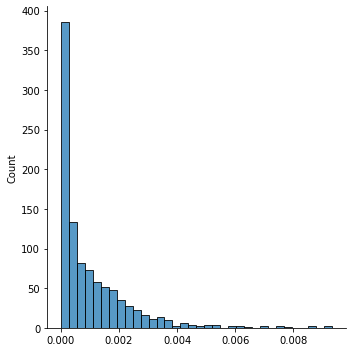

In [ ]:
## Default feature importance
sns.displot(clf.feature_importances_,)

In [ ]:
from sklearn.inspection import permutation_importance

In [ ]:
result = permutation_importance(clf,random_matrix_array,target, n_repeats=10, random_state=0)

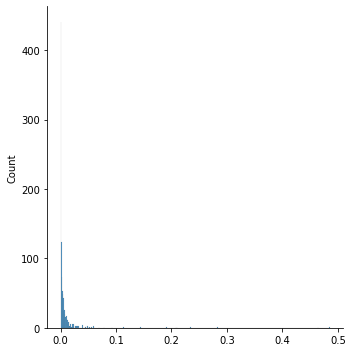

In [ ]:
sns.displot(result.importances_mean)

### Extrapolation

Tree-based methods cannot extrapolate while lienar models can easily do that.

We consider an example dataset with linear relationship under Gaussian noise. xgboost fails to extrapolate and gives a constant prediction instead. Linear models as expected can learn this relationship perfectly.

This suggests a limitation of tree-based models in finance as it cannot easily learn rules that generalise to unseen market conditions.





In [ ]:
from xgboost import XGBRegressor
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

def f(x):
    return 2*x+3+np.random.normal(0,1)

data = pd.DataFrame([(x, 3, f(x)) for x in range(0,500)], columns=['x','three', 'target'])

X_train, X_test, y_train, y_test = train_test_split(
     data.drop('target',axis=1), data.target, test_size=0.20, shuffle=False)

In [ ]:
clf=XGBRegressor(n_estimators=1000, max_depth=400, random_state=42)
clf.fit(X = X_train, y=y_train,)
pred = clf.predict(X_test)
mean_absolute_error(pred, y_test)

[10:04:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


101.01063224244855

In [ ]:
pd.concat([X_test, y_test, pd.DataFrame(pred, index=y_test.index, columns=['pred'])], axis=1).tail()

,x,three,target,pred
495,495,3,992.351212,801.000977
496,496,3,995.947526,801.000977
497,497,3,998.185794,801.000977
498,498,3,999.257076,801.000977
499,499,3,1000.595436,801.000977


In [ ]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X = X_train, y=y_train,)
lm_pred = lm.predict(X_test)
mean_absolute_error(lm_pred, y_test)

0.7952012517133471

### Numerai

Numerai is a trading challenge that allows researchers to stake on their models. In principle you can build you own Long/Short Equity hedge fund through their platform. High quality data is provided by the platform and researchers are only required to upload predictions of their model each week.

The dataset is in the form of a table where normalised features and targets along with prediction targets are given for each era.

A few techniques from the example by Numerai
- Target Ensemble: Train models on related targets to perform regularisation
- Neutralise feature dependencies: neutralise target dependence on features in each era





### Recommend Readings

- TabNet: Attentive Interpretable Tabular Learning https://arxiv.org/pdf/1908.07442.pdf
- XGBoost: A Scalable Tree Boosting System https://arxiv.org/abs/1603.02754

## Lecture 9 Time-Series methods

We discuss various machine learning methods developed for time-series data and other financial datasets. Machine Learning methods allow us to process non-traditional datasets such as Regulatory filings, News, Social Media in the form of text, images and networks.

There are three main tasks for time-series analysis. Smoothing and Filtering is easy and forecast is difficult.
- Smoothing (Analyse historical time-series)
- Filtering (Analyse time-series as data arrives)
- Forecast (Predict Future movements)

### Recent methods on time-series prediction


#### Markov Assumption

Many machine learning methods such as Hidden Makove Models rely on Markov Assumption, which means future return is independent of historical return, conditioning on current return.

Reinforcement Learning algorithms often relies on Markov assumption as what it does is to solve a Makov Decision Process. (Technical Note: All the leading RL approches such as Q-learning, A3C, PPO, SAC has this Makov assumption). It is well-known that financial time-series is long-memory. In order to apply RL algorithm for trading, the challenge is to find ways so that the policy can take into account the long-memory.


#### Econometrics

Auto-regressive Models (AR models) and Moving Average Models (MA models) are used to analyse stationary time-series. There are many varaints of these models that have been proposed in econometrics research. The most famous ones include ARIMA model and GARCH model. These models are good for filtering and smoothing. However, many empricial studies suggest these models have limited ability for prediction.

Very similar to these models would be Wavelets and other Fourier-transformed based models which has been used in signal processing in the 1990s. These models are out-of-fashion since the populatiry of deep learning methods so we will not give an indepth discussion here.


#### Deep Learning

Recent development in deep learning methods can address some of the challenges in modelling the long-term dependencies of financial time-series. Many models, originally developed for genetic sequence modelling and image processing have been applied on stock price returns. Examples include Long-Short Term Memory (LSTM), Convolution Neural Network (CNN).

Due to the non-stationary nature of financial time-series, applying deep learning methods directly would NOT give a good prediction. However, with a robust train and test split, combined with different regularisation methods, deep learning methods applied on normalised price data can outperform existing time-series models.


#### Feature Engineering

Recent approaches for time-series modelling would involve extracting features from time-series and then apply standard machine learning algorithms such as xgboost and MLP on these features for different tasks.

A supervised way to extract features would be tsfresh, which uses standard statistical measuresand fourier coefficients to summarise a time-series.



















### Why applying ML on financial data is difficult

Machine Learning methods are highly sensitive to the quality of input data. Applying advanced methods on Yahoo Finance data will not give you a good result.  

Many Machine Learning methods will use accuracy (classfication) or mean-square error (regression) as loss function. However it is often NOT the best choice to simply predict whether the asset price is going up or down.

Financial data is non-stationary and most ML methods, applied at an naive way will perform poorly.

Data normalisation is necessary for Machine Learning methods. For financial data, designing a robust way to handle outliers and normalise various factors is often more important than choosing the most fancy ML methods. Do not under-estimate how much a model can improve with a suitable pre-processing method.

While there are vast amount of publications in applying ML methods on financial data, not many papers has useful ideas due to the following reasons

- The models are taken from other applications such as image processing where the data are stationary. Many papers offer little adjustements to these models and it is not suprising that the performance is not good
- The backtest period is often short-lived (since 2010), especially for papers that require the use of sentiment data. These models are not backtested under an adversarial situation such as the dot-com bubble or financial crisis.
- The best ideas to apply ML to financial data would not be published due to the fact they are highly profitable

Overfitting is very common for financial datasets. Choosing a slightly different method of feature transformation and engineering can change performance a lot, as does reflected in the ranking in Kaggle Challenges.

### Summary from Kaggle challenges

We summarise some techniques for Kaggle financial challenges


- Target construction
    - Prediction Target can be something other than return, such as max_return, min_return to capture path dependencies
    - Ensemble prediction target over different time-horizons for regularisation

- Feature Engineering
    - For orderbook data, different measures of volume-weighted average prices and liquidity measures
    - To uncover hidden temporal relationship between assets, the original stock price can be recovered from the tick size given the normalised stock price and then TSNE can be used to reorder the stock price
    - To uncover hidden correlation between assets, as the stock ticker is NOT provided, clustering methods such as k-NN can be used

- Data Cleaning
    - Removing outliers and old data can improve model training

- Cross Validation
    - Group by different time periods with gaps to avoid look-ahead bias

- Ensemble
    - Random seed ensemble can improve performance
    - Ensemble across well-known methods such as xgboost, TabNet, MLP
    - Choosing a different weighting of models in the ensemble can improve performance, but make sure NOT to overfit to the public leaderboard


Good posts on Kaggle

- Ensemble of LGBM, MLP and TabNet https://www.kaggle.com/c/optiver-realized-volatility-prediction/discussion/278588
- Nearest Neighbours https://www.kaggle.com/c/optiver-realized-volatility-prediction/discussion/274970
- Attention RNN https://www.kaggle.com/c/optiver-realized-volatility-prediction/discussion/279170
- Feature Engineering for Order Book https://www.kaggle.com/c/optiver-realized-volatility-prediction/discussion/276137


- Supervised Autoencoder with MLP https://www.kaggle.com/c/jane-street-market-prediction/discussion/224348
- Geometric Brownian motion https://www.kaggle.com/c/jane-street-market-prediction/discussion/226837
- MLP with some feature engineering https://www.kaggle.com/c/jane-street-market-prediction/discussion/224029

### Random Walk Hypothesis

What if we apply trend following strategies on random walk (with and without drifts)

What if we apply trend following strategies on Fractional Brownian motion with different Hurst parameter


### Recommended Readings

- Deep Learning for Financial Applications : A Survey https://arxiv.org/abs/2002.05786
- tsfresh https://tsfresh.com/


## Lecture 10 Building your backtest system



In [ ]:
def simple_backtest(ticker='QQQ', benchmark='SHY', lookback=120, shift=2, start='2000-01-01', end='2031-01-01'):

  col_name = 'Adj Close'
  stock = yf.download(ticker, start=start, end=end).dropna()
  stock['Return'] = stock[col_name].pct_change()
  benchmark = yf.download(benchmark, start='2003-01-01', end=end).dropna()
  benchmark['Return'] = benchmark[col_name].pct_change()

  ## z-score signal
  stock['BB_Width'] = stock[col_name].rolling(60).std()
  stock['BB_Moving'] = stock[col_name].rolling(60).mean()
  stock['signal'] = np.clip((stock[col_name]-stock['BB_Moving']) / stock['BB_Width'],0,1).rolling(lookback).mean()

  portfolio = stock['signal'] * stock['Return'].shift(shift) + (1-stock['signal']) * benchmark['Return'].shift(shift)

  return stock, benchmark, portfolio

In [ ]:
stock, benchmark, portfolio = simple_backtest(ticker='SPY')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<Axes: xlabel='Date'>

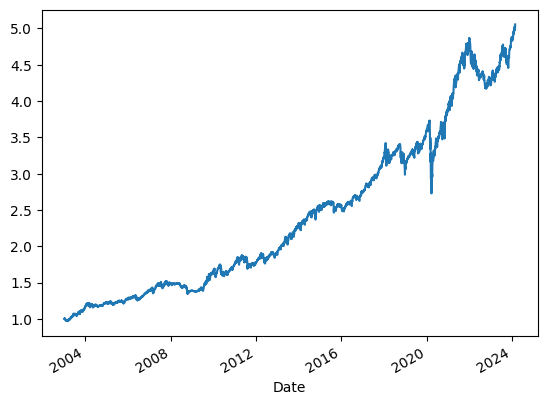

In [ ]:
(1+portfolio.dropna()).cumprod().plot()

In [ ]:
strategy_metrics(portfolio.dropna())

{'sharpe': 0.8223857804020488,
 'mean': 0.08172351448364193,
 'volatility': 0.09937369593585246,
 'skew': -0.7544921397805809,
 'kurtosis': 19.681885807328836,
 'max_drawdown': 0.26923321828115193,
 'calmar': 0.30354172120878703}

In [ ]:
strategy_metrics(stock['Return'].reindex(portfolio.dropna().index))

{'sharpe': 0.6209892935486224,
 'mean': 0.11691111674077227,
 'volatility': 0.18826591368860426,
 'skew': -0.07419943442232656,
 'kurtosis': 14.81034434059272,
 'max_drawdown': 0.55189449051898,
 'calmar': 0.21183599175058557}

In [ ]:
strategy_metrics(benchmark['Return'].reindex(portfolio.dropna().index))

{'sharpe': 1.1231381614125135,
 'mean': 0.01694246842529046,
 'volatility': 0.015084937016103864,
 'skew': 0.3241764746794615,
 'kurtosis': 7.803788715944458,
 'max_drawdown': 0.05707071568173496,
 'calmar': 0.296867986022344}

<Axes: xlabel='Date'>

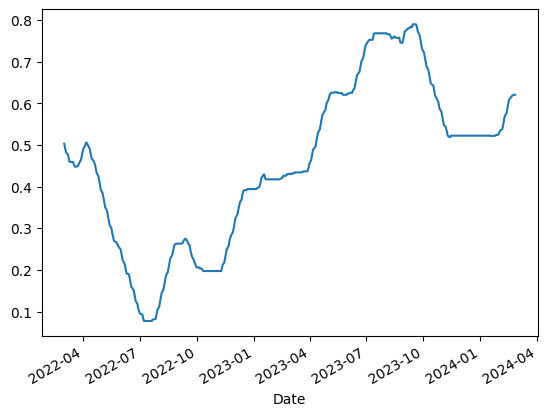

In [ ]:
stock['signal'].tail(500).plot()